In [1]:
dados ='/home/dev/PycharmProjects/FallDetection/conv/mobiact/Conv1d/Dominio do Tempo/dados_tempo.npy'
rotulos ='/home/dev/PycharmProjects/FallDetection/conv/mobiact/rotulos_tempo.npy'

import numpy as np
X = np.load(dados)
y = np.load(rotulos)


In [2]:
def rede_MLP(X,y,i):

    from sklearn.model_selection import train_test_split

    # Dividindo os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    # Dividindo o conjunto de treinamento em conjunto de treinamento e validação
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)
    
    X_train.tolist()
    y_train.tolist()
    X_test.tolist()
    y_test.tolist()
    X_val.tolist()
    y_val.tolist()

    from keras.utils import to_categorical
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    y_val = to_categorical(y_val)

    

    from keras.models import Sequential
    from keras.layers import Dense, Activation, Dropout


    model = Sequential()
    model.add(Dense(1543, input_dim=400, kernel_initializer='normal',activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(1543, kernel_initializer='normal',activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(1543, kernel_initializer='normal',activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(1543, kernel_initializer='normal',activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(2, kernel_initializer='normal',activation="softmax"))
    
    from keras.optimizers import SGD
    otimizador = SGD() 
    model.compile(loss="categorical_crossentropy",optimizer=otimizador,metrics =["acc"])
    historico = model.fit(X_train,y_train, epochs= 150, batch_size = 32, validation_data=(X_val,y_val), verbose = 1)

    
    
    model.summary()

    import matplotlib.pyplot as plt


    acuracia_treino = historico.history['acc'] 
    acuracia_val = historico.history['val_acc']

    epochs = range(1, len(acuracia_treino)+1) 

    plt.plot(epochs,acuracia_treino, "-g", label="Acurácia Dados de Treino") 
    plt.plot(epochs,acuracia_val, "-b", label = "Acurácia Dados de Validação")
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Acurácia')
    plt.show()

    import numpy as np
    import matplotlib.pyplot as plt
    import itertools
    from sklearn.metrics import confusion_matrix

    # Obtendo as probabilidades das classes previstas
    y_pred_probs = model.predict(X_test)

    # Obtendo as classes previstas
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Obtendo as classes reais
    y_true = np.argmax(y_test, axis=1)

    # Calculando a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)

    # Plotando a matriz de confusão
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão')
    plt.colorbar()
    tick_marks = np.arange(0, 2)
    plt.xticks(tick_marks, rotation=90)
    plt.yticks(tick_marks)

    # Adicionando os números nas células da matriz
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo Real')
    plt.xlabel('Rótulo Previsto')
    plt.show()

    from sklearn.metrics import classification_report


    target_names = np.arange(0, 2).astype(str)
    print(classification_report(y_true, y_pred, target_names=target_names))
    
    from sklearn.metrics import matthews_corrcoef
    mcc = matthews_corrcoef(y_true, y_pred)
    print(f'MCC = {mcc}')
    
    from sklearn.metrics import roc_curve, roc_auc_score
    # Calcula a AUC
    roc_auc = roc_auc_score(y_true, y_pred)
    # Calcula a curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    # Plota a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    # Salvar o modelo em formato HDF5
    model.save(f'MLP_freq_{i}.h5')






2023-07-27 14:57:44.244168: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-27 14:57:47.728489: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-27 14:57:47.733157: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-27 14:57:54.902444: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-27 14:58:02.987177: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

Epoch 1/150
302/302 [==============================] - 10s 33ms/step - loss: 0.5327 - acc: 0.9352 - val_loss: 0.1687 - val_acc: 0.9518
Epoch 2/150
302/302 [==============================] - 9s 31ms/step - loss: 0.1886 - acc: 0.9475 - val_loss: 1.0261 - val_acc: 0.1721
Epoch 3/150
302/302 [==============================] - 10s 32ms/step - loss: 0.1652 - acc: 0.9507 - val_loss: 0.1313 - val_acc: 0.9536
Epoch 4/150
302/302 [==============================] - 9s 31ms/step - loss: 0.1449 - acc: 0.9530 - val_loss: 0.5200 - val_acc: 0.7722
Epoch 5/150
302/302 [==============================] - 9s 30ms/step - loss: 0.1323 - acc: 0.9588 - val_loss: 0.0942 - val_acc: 0.9726
Epoch 6/150
302/302 [==============================] - 9s 30ms/step - loss: 0.1222 - acc: 0.9620 - val_loss: 0.0911 - val_acc: 0.9711
Epoch 7/150
302/302 [==============================] - 9s 30ms/step - loss: 0.1085 - acc: 0.9658 - val_loss: 0.3033 - val_acc: 0.8886
Epoch 8/150
302/302 [==============================] - 9s 30

Epoch 62/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0269 - acc: 0.9916 - val_loss: 0.0452 - val_acc: 0.9869
Epoch 63/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0275 - acc: 0.9902 - val_loss: 0.0414 - val_acc: 0.9866
Epoch 64/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0255 - acc: 0.9913 - val_loss: 1.5094 - val_acc: 0.6113
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0545 - acc: 0.9815 - val_loss: 0.0551 - val_acc: 0.9844
Epoch 66/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0597 - acc: 0.9792 - val_loss: 0.0695 - val_acc: 0.9751
Epoch 67/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0402 - acc: 0.9864 - val_loss: 0.0436 - val_acc: 0.9863
Epoch 68/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0387 - acc: 0.9854 - val_loss: 0.0400 - val_acc: 0.9872
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 9s 29ms/step - loss: 0.0819 - acc: 0.9696 - val_loss: 0.0629 - val_acc: 0.9785
Epoch 123/150
302/302 [==============================] - 9s 30ms/step - loss: 0.0472 - acc: 0.9835 - val_loss: 0.0547 - val_acc: 0.9795
Epoch 124/150
302/302 [==============================] - 9s 30ms/step - loss: 0.0538 - acc: 0.9806 - val_loss: 0.0639 - val_acc: 0.9807
Epoch 125/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0667 - acc: 0.9756 - val_loss: 0.0725 - val_acc: 0.9770
Epoch 126/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0597 - acc: 0.9783 - val_loss: 0.0505 - val_acc: 0.9851
Epoch 127/150
302/302 [==============================] - 9s 30ms/step - loss: 0.0530 - acc: 0.9798 - val_loss: 0.0631 - val_acc: 0.9804
Epoch 128/150
302/302 [==============================] - 10s 32ms/step - loss: 0.0521 - acc: 0.9795 - val_loss: 0.6234 - val_acc: 0.6701
Epoch 129/150
302/302 [==============================] - 9s 3

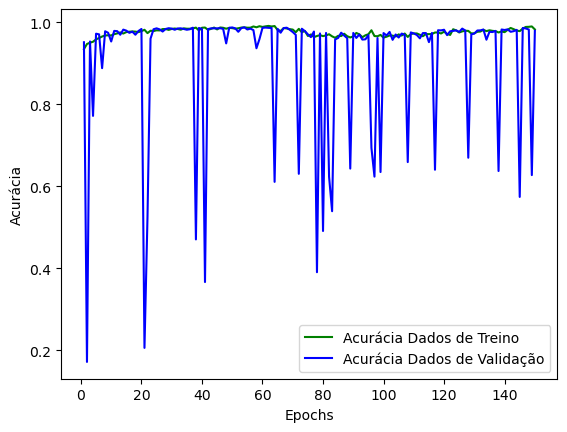

101/101 [==============================] - 1s 6ms/step


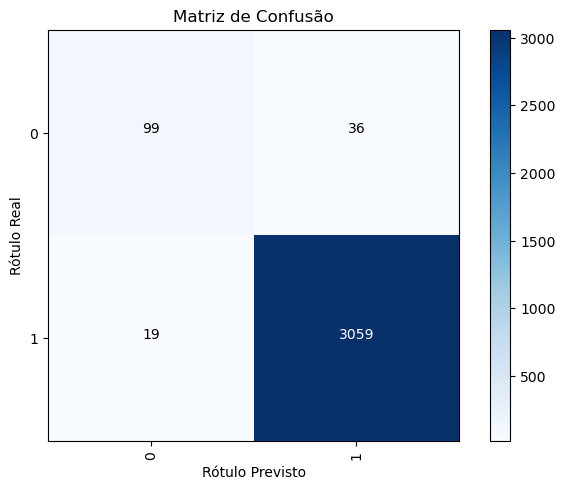

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       135
           1       0.99      0.99      0.99      3078

    accuracy                           0.98      3213
   macro avg       0.91      0.86      0.89      3213
weighted avg       0.98      0.98      0.98      3213

MCC = 0.7756398926353512


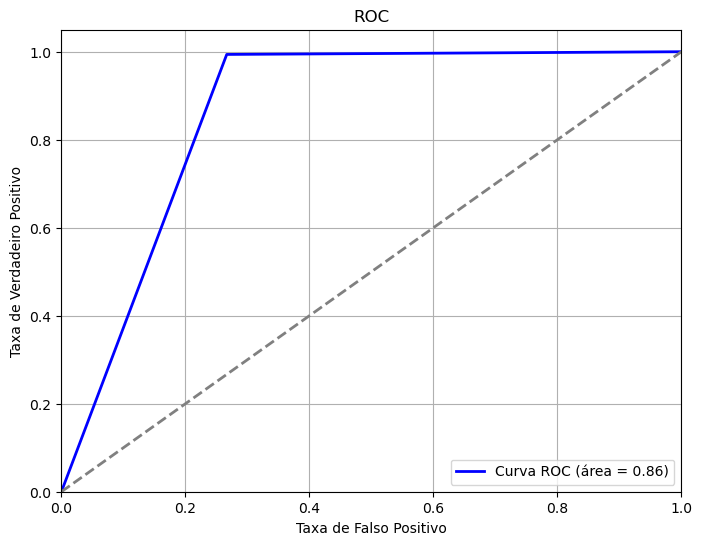

In [3]:
rede_MLP(X,y,1)

Epoch 1/150
302/302 [==============================] - 10s 32ms/step - loss: 0.4312 - acc: 0.9325 - val_loss: 0.1533 - val_acc: 0.9549
Epoch 2/150
302/302 [==============================] - 10s 35ms/step - loss: 0.2033 - acc: 0.9468 - val_loss: 0.1351 - val_acc: 0.9549
Epoch 3/150
302/302 [==============================] - 10s 33ms/step - loss: 0.1761 - acc: 0.9505 - val_loss: 0.2240 - val_acc: 0.9620
Epoch 4/150
302/302 [==============================] - 9s 30ms/step - loss: 0.1604 - acc: 0.9533 - val_loss: 0.1066 - val_acc: 0.9611
Epoch 5/150
302/302 [==============================] - 9s 30ms/step - loss: 0.1370 - acc: 0.9600 - val_loss: 0.0870 - val_acc: 0.9735
Epoch 6/150
302/302 [==============================] - 9s 29ms/step - loss: 0.1290 - acc: 0.9613 - val_loss: 0.0825 - val_acc: 0.9763
Epoch 7/150
302/302 [==============================] - 9s 29ms/step - loss: 0.1137 - acc: 0.9646 - val_loss: 0.1480 - val_acc: 0.9574
Epoch 8/150
302/302 [==============================] - 9s 3

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0288 - acc: 0.9902 - val_loss: 0.0633 - val_acc: 0.9819
Epoch 63/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0268 - acc: 0.9902 - val_loss: 0.0563 - val_acc: 0.9829
Epoch 64/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0325 - acc: 0.9879 - val_loss: 0.0489 - val_acc: 0.9838
Epoch 65/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0327 - acc: 0.9878 - val_loss: 0.0357 - val_acc: 0.9894
Epoch 66/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0240 - acc: 0.9911 - val_loss: 0.0428 - val_acc: 0.9897
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0284 - acc: 0.9902 - val_loss: 1.9937 - val_acc: 0.4961
Epoch 68/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0794 - acc: 0.9770 - val_loss: 0.0348 - val_acc: 0.9882
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 9s 28ms/step - loss: 0.0705 - acc: 0.9725 - val_loss: 0.0744 - val_acc: 0.9707
Epoch 123/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0749 - acc: 0.9737 - val_loss: 0.7975 - val_acc: 0.6259
Epoch 124/150
302/302 [==============================] - 9s 30ms/step - loss: 0.0890 - acc: 0.9661 - val_loss: 0.0754 - val_acc: 0.9704
Epoch 125/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0755 - acc: 0.9705 - val_loss: 0.0538 - val_acc: 0.9823
Epoch 126/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0767 - acc: 0.9709 - val_loss: 0.0741 - val_acc: 0.9739
Epoch 127/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0829 - acc: 0.9692 - val_loss: 0.0604 - val_acc: 0.9795
Epoch 128/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0872 - acc: 0.9654 - val_loss: 0.0763 - val_acc: 0.9714
Epoch 129/150
302/302 [==============================] - 9s 29

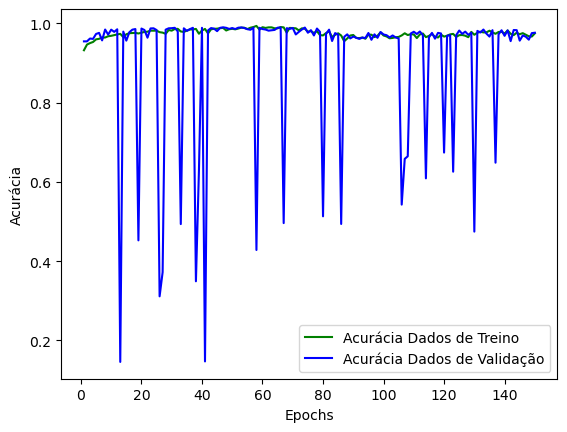

101/101 [==============================] - 1s 6ms/step


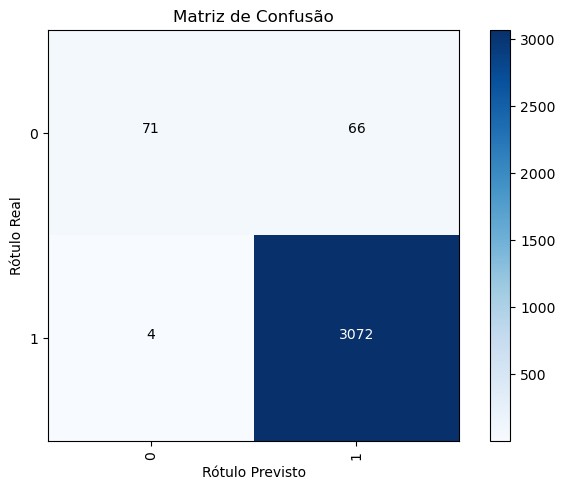

              precision    recall  f1-score   support

           0       0.95      0.52      0.67       137
           1       0.98      1.00      0.99      3076

    accuracy                           0.98      3213
   macro avg       0.96      0.76      0.83      3213
weighted avg       0.98      0.98      0.98      3213

MCC = 0.691740218411626


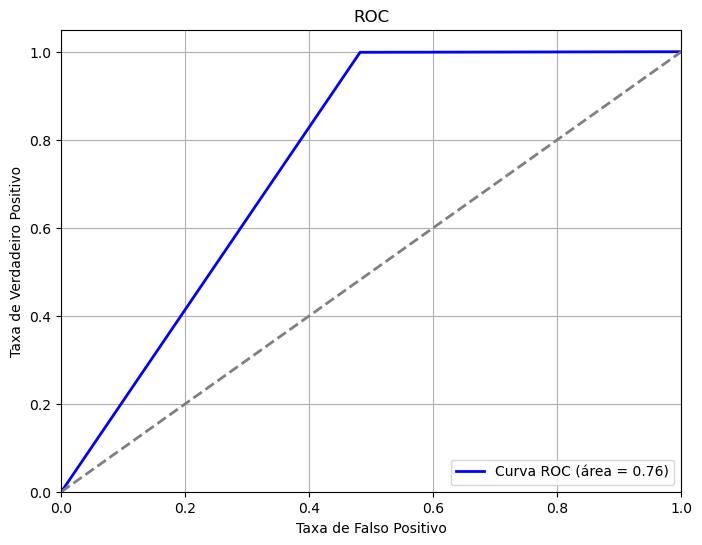

In [4]:
rede_MLP(X,y,2)

Epoch 1/150
302/302 [==============================] - 9s 29ms/step - loss: 0.5428 - acc: 0.9353 - val_loss: 0.1495 - val_acc: 0.9533
Epoch 2/150
302/302 [==============================] - 9s 29ms/step - loss: 0.1888 - acc: 0.9486 - val_loss: 0.1376 - val_acc: 0.9552
Epoch 3/150
302/302 [==============================] - 9s 29ms/step - loss: 0.1684 - acc: 0.9521 - val_loss: 0.1149 - val_acc: 0.9620
Epoch 4/150
302/302 [==============================] - 9s 29ms/step - loss: 0.1437 - acc: 0.9563 - val_loss: 0.4674 - val_acc: 0.7856
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1376 - acc: 0.9562 - val_loss: 1.3507 - val_acc: 0.2350
Epoch 6/150
302/302 [==============================] - 9s 29ms/step - loss: 0.1215 - acc: 0.9592 - val_loss: 0.0917 - val_acc: 0.9785
Epoch 7/150
302/302 [==============================] - 9s 29ms/step - loss: 0.1088 - acc: 0.9654 - val_loss: 0.0884 - val_acc: 0.9770
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0286 - acc: 0.9893 - val_loss: 0.0368 - val_acc: 0.9866
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0205 - acc: 0.9924 - val_loss: 0.0482 - val_acc: 0.9857
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0345 - acc: 0.9874 - val_loss: 0.0434 - val_acc: 0.9851
Epoch 65/150
302/302 [==============================] - 9s 30ms/step - loss: 0.0286 - acc: 0.9896 - val_loss: 0.0366 - val_acc: 0.9866
Epoch 66/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0268 - acc: 0.9889 - val_loss: 0.0427 - val_acc: 0.9851
Epoch 67/150
302/302 [==============================] - 9s 30ms/step - loss: 0.0458 - acc: 0.9829 - val_loss: 0.0534 - val_acc: 0.9810
Epoch 68/150
302/302 [==============================] - 9s 30ms/step - loss: 0.0346 - acc: 0.9873 - val_loss: 0.0429 - val_acc: 0.9851
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 9s 29ms/step - loss: 0.0845 - acc: 0.9653 - val_loss: 0.0693 - val_acc: 0.9751
Epoch 123/150
302/302 [==============================] - 9s 30ms/step - loss: 0.0791 - acc: 0.9691 - val_loss: 0.0568 - val_acc: 0.9788
Epoch 124/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0687 - acc: 0.9745 - val_loss: 0.0987 - val_acc: 0.9645
Epoch 125/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0845 - acc: 0.9681 - val_loss: 0.1065 - val_acc: 0.9614
Epoch 126/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0692 - acc: 0.9739 - val_loss: 0.0725 - val_acc: 0.9773
Epoch 127/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0726 - acc: 0.9723 - val_loss: 0.0660 - val_acc: 0.9767
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0848 - acc: 0.9696 - val_loss: 0.0950 - val_acc: 0.9679
Epoch 129/150
302/302 [==============================] - 8s 28

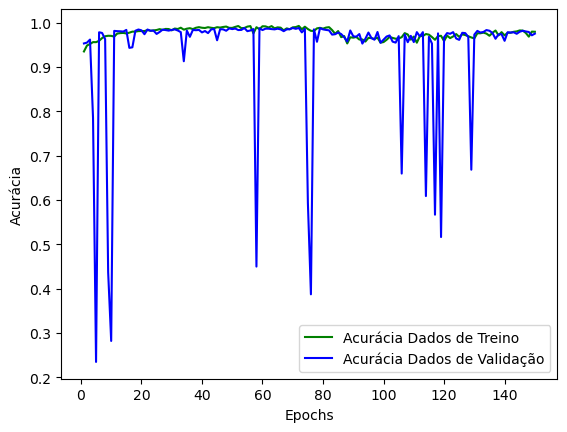

101/101 [==============================] - 1s 5ms/step


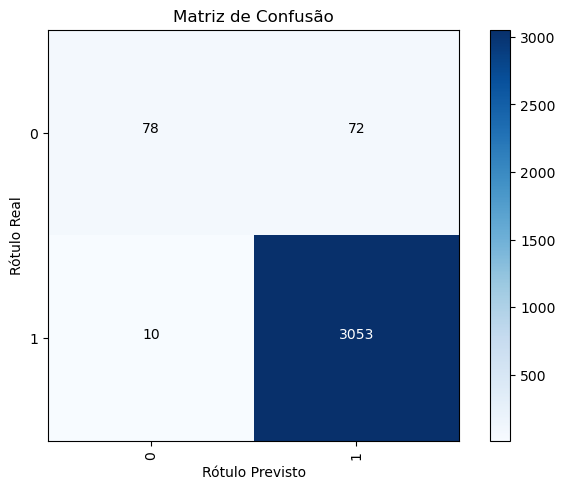

              precision    recall  f1-score   support

           0       0.89      0.52      0.66       150
           1       0.98      1.00      0.99      3063

    accuracy                           0.97      3213
   macro avg       0.93      0.76      0.82      3213
weighted avg       0.97      0.97      0.97      3213

MCC = 0.6679144669237151


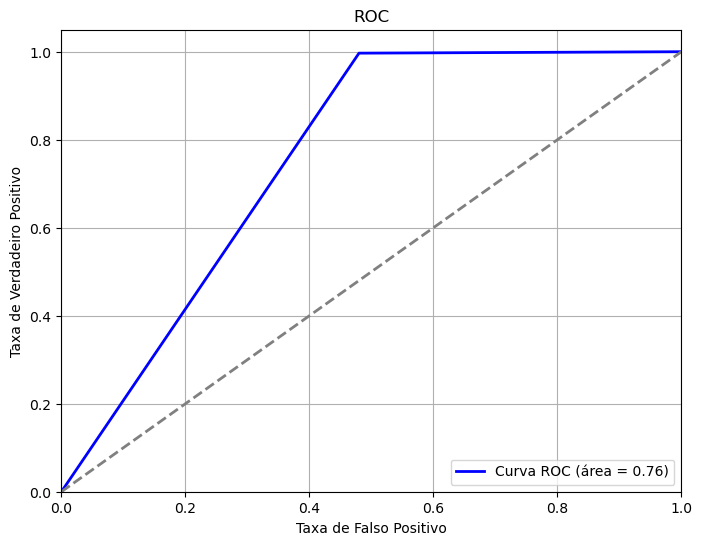

In [5]:
rede_MLP(X,y,3)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.4252 - acc: 0.9379 - val_loss: 0.1778 - val_acc: 0.9458
Epoch 2/150
302/302 [==============================] - 9s 28ms/step - loss: 0.1931 - acc: 0.9508 - val_loss: 0.1887 - val_acc: 0.9458
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1757 - acc: 0.9526 - val_loss: 0.6548 - val_acc: 0.6561
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1546 - acc: 0.9556 - val_loss: 0.1290 - val_acc: 0.9564
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1430 - acc: 0.9582 - val_loss: 1.1058 - val_acc: 0.2334
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1303 - acc: 0.9576 - val_loss: 0.1026 - val_acc: 0.9664
Epoch 7/150
302/302 [==============================] - 9s 28ms/step - loss: 0.1099 - acc: 0.9658 - val_loss: 0.1178 - val_acc: 0.9729
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0239 - acc: 0.9917 - val_loss: 0.0528 - val_acc: 0.9854
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0217 - acc: 0.9915 - val_loss: 0.1594 - val_acc: 0.9661
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0225 - acc: 0.9919 - val_loss: 0.0676 - val_acc: 0.9829
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0219 - acc: 0.9929 - val_loss: 0.0436 - val_acc: 0.9863
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0234 - acc: 0.9919 - val_loss: 0.0529 - val_acc: 0.9832
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0220 - acc: 0.9923 - val_loss: 0.0512 - val_acc: 0.9869
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0188 - acc: 0.9929 - val_loss: 0.0723 - val_acc: 0.9816
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 9s 28ms/step - loss: 0.0770 - acc: 0.9698 - val_loss: 0.5577 - val_acc: 0.9458
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0633 - acc: 0.9777 - val_loss: 0.0890 - val_acc: 0.9748
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0818 - acc: 0.9689 - val_loss: 0.0796 - val_acc: 0.9748
Epoch 125/150
302/302 [==============================] - 9s 29ms/step - loss: 0.0946 - acc: 0.9665 - val_loss: 0.4981 - val_acc: 0.6452
Epoch 126/150
302/302 [==============================] - 9s 30ms/step - loss: 0.0619 - acc: 0.9776 - val_loss: 2.7542 - val_acc: 0.5472
Epoch 127/150
302/302 [==============================] - 9s 31ms/step - loss: 0.0729 - acc: 0.9763 - val_loss: 0.0891 - val_acc: 0.9732
Epoch 128/150
302/302 [==============================] - 9s 31ms/step - loss: 0.0600 - acc: 0.9784 - val_loss: 0.0786 - val_acc: 0.9757
Epoch 129/150
302/302 [==============================] - 9s 31

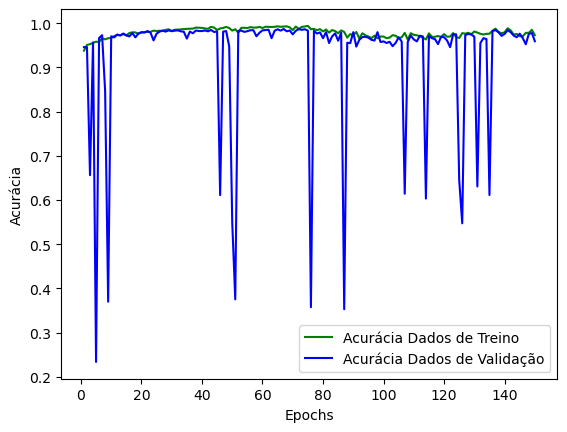

101/101 [==============================] - 1s 5ms/step


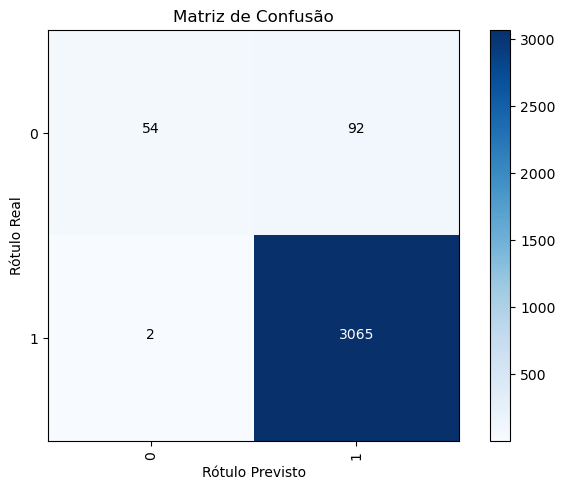

              precision    recall  f1-score   support

           0       0.96      0.37      0.53       146
           1       0.97      1.00      0.98      3067

    accuracy                           0.97      3213
   macro avg       0.97      0.68      0.76      3213
weighted avg       0.97      0.97      0.96      3213

MCC = 0.5875928979221451


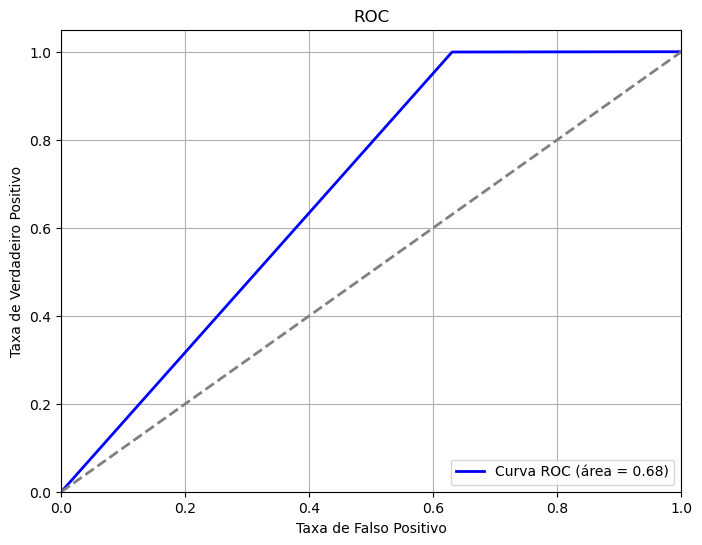

In [6]:
rede_MLP(X,y,4)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.4158 - acc: 0.9380 - val_loss: 0.5872 - val_acc: 0.7603
Epoch 2/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1957 - acc: 0.9493 - val_loss: 0.1377 - val_acc: 0.9567
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1638 - acc: 0.9525 - val_loss: 0.1107 - val_acc: 0.9595
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1469 - acc: 0.9573 - val_loss: 0.9016 - val_acc: 0.3175
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1312 - acc: 0.9593 - val_loss: 0.1006 - val_acc: 0.9661
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1180 - acc: 0.9638 - val_loss: 0.0850 - val_acc: 0.9732
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1087 - acc: 0.9669 - val_loss: 0.0791 - val_acc: 0.9776
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0270 - acc: 0.9900 - val_loss: 0.0492 - val_acc: 0.9863
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0224 - acc: 0.9915 - val_loss: 0.0386 - val_acc: 0.9866
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0626 - acc: 0.9822 - val_loss: 0.0392 - val_acc: 0.9891
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0252 - acc: 0.9918 - val_loss: 0.0479 - val_acc: 0.9844
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0323 - acc: 0.9889 - val_loss: 0.0475 - val_acc: 0.9869
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0369 - acc: 0.9866 - val_loss: 0.0627 - val_acc: 0.9813
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0280 - acc: 0.9899 - val_loss: 0.0391 - val_acc: 0.9882
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0561 - acc: 0.9792 - val_loss: 0.0701 - val_acc: 0.9748
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0730 - acc: 0.9732 - val_loss: 0.0859 - val_acc: 0.9717
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0697 - acc: 0.9756 - val_loss: 0.0800 - val_acc: 0.9751
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0817 - acc: 0.9689 - val_loss: 0.0710 - val_acc: 0.9754
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0718 - acc: 0.9755 - val_loss: 0.0800 - val_acc: 0.9742
Epoch 127/150
302/302 [==============================] - 9s 28ms/step - loss: 0.1007 - acc: 0.9644 - val_loss: 0.1243 - val_acc: 0.9599
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0813 - acc: 0.9697 - val_loss: 0.1092 - val_acc: 0.9667
Epoch 129/150
302/302 [==============================] - 8s 28

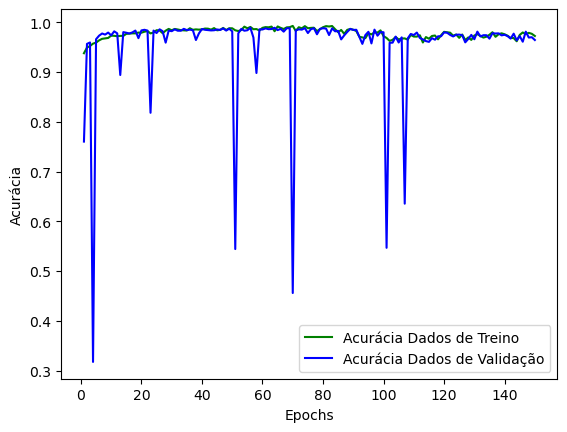

101/101 [==============================] - 1s 5ms/step


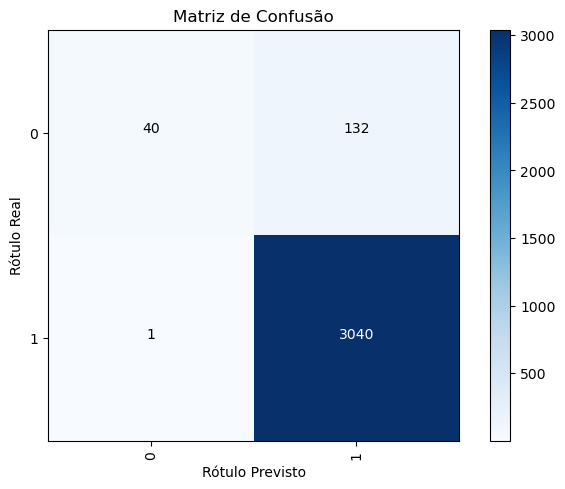

              precision    recall  f1-score   support

           0       0.98      0.23      0.38       172
           1       0.96      1.00      0.98      3041

    accuracy                           0.96      3213
   macro avg       0.97      0.62      0.68      3213
weighted avg       0.96      0.96      0.95      3213

MCC = 0.465726477943107


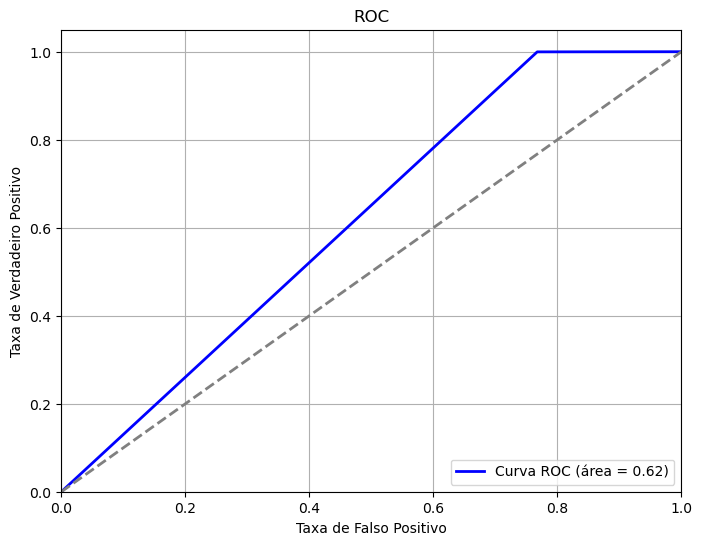

In [7]:
rede_MLP(X,y,5)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.5158 - acc: 0.9405 - val_loss: 0.1567 - val_acc: 0.9539
Epoch 2/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1853 - acc: 0.9508 - val_loss: 0.3010 - val_acc: 0.9309
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1652 - acc: 0.9538 - val_loss: 0.1331 - val_acc: 0.9592
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1452 - acc: 0.9584 - val_loss: 0.1181 - val_acc: 0.9645
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1255 - acc: 0.9610 - val_loss: 0.2502 - val_acc: 0.9318
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1144 - acc: 0.9652 - val_loss: 0.1146 - val_acc: 0.9673
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1064 - acc: 0.9687 - val_loss: 0.1337 - val_acc: 0.9670
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0533 - acc: 0.9825 - val_loss: 0.1243 - val_acc: 0.9686
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0491 - acc: 0.9817 - val_loss: 0.0723 - val_acc: 0.9760
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0372 - acc: 0.9865 - val_loss: 0.0592 - val_acc: 0.9816
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0362 - acc: 0.9874 - val_loss: 0.9937 - val_acc: 0.5755
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0467 - acc: 0.9827 - val_loss: 0.0494 - val_acc: 0.9857
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0417 - acc: 0.9843 - val_loss: 0.0615 - val_acc: 0.9813
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0347 - acc: 0.9887 - val_loss: 0.0567 - val_acc: 0.9807
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0672 - acc: 0.9766 - val_loss: 0.0907 - val_acc: 0.9720
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0745 - acc: 0.9737 - val_loss: 0.1609 - val_acc: 0.9567
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0803 - acc: 0.9705 - val_loss: 0.1408 - val_acc: 0.9586
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0776 - acc: 0.9718 - val_loss: 0.1116 - val_acc: 0.9670
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0747 - acc: 0.9723 - val_loss: 0.1251 - val_acc: 0.9667
Epoch 127/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0569 - acc: 0.9817 - val_loss: 0.1236 - val_acc: 0.9664
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0646 - acc: 0.9771 - val_loss: 0.0669 - val_acc: 0.9795
Epoch 129/150
302/302 [==============================] - 8s 28

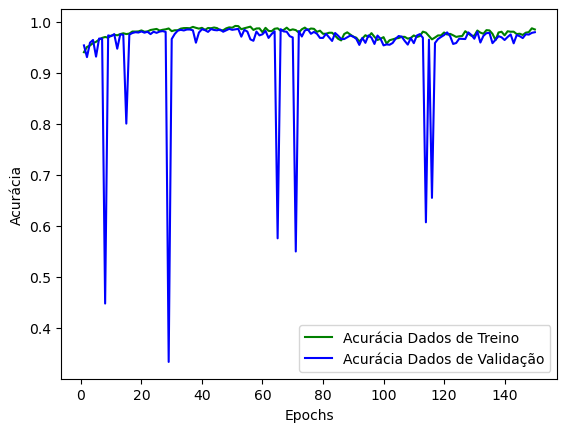

101/101 [==============================] - 1s 5ms/step


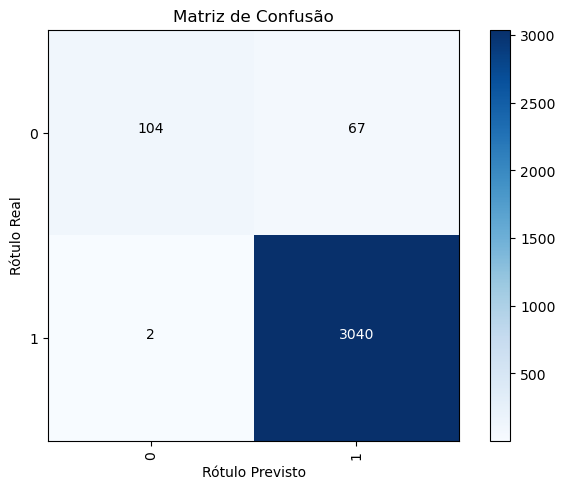

              precision    recall  f1-score   support

           0       0.98      0.61      0.75       171
           1       0.98      1.00      0.99      3042

    accuracy                           0.98      3213
   macro avg       0.98      0.80      0.87      3213
weighted avg       0.98      0.98      0.98      3213

MCC = 0.763522069725722


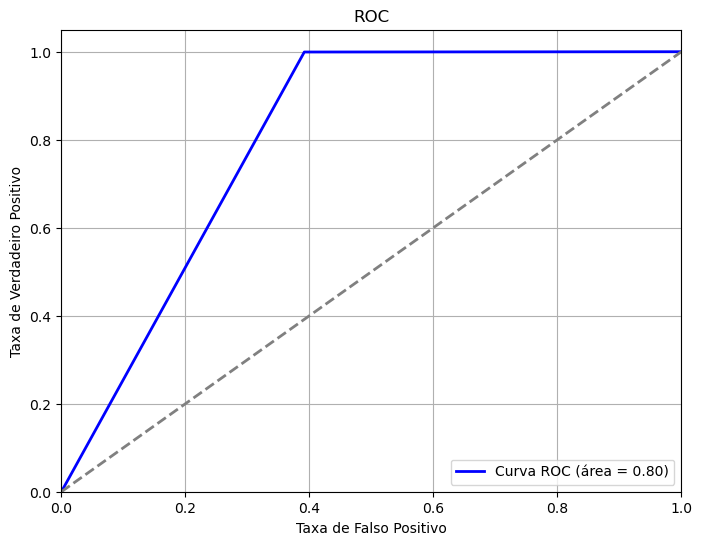

In [8]:
rede_MLP(X,y,6)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.5570 - acc: 0.9379 - val_loss: 1.0086 - val_acc: 0.1329
Epoch 2/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1875 - acc: 0.9509 - val_loss: 0.1442 - val_acc: 0.9542
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1650 - acc: 0.9535 - val_loss: 0.1390 - val_acc: 0.9620
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1463 - acc: 0.9550 - val_loss: 0.1053 - val_acc: 0.9602
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1297 - acc: 0.9587 - val_loss: 1.2401 - val_acc: 0.1973
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1276 - acc: 0.9575 - val_loss: 0.1226 - val_acc: 0.9717
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1147 - acc: 0.9626 - val_loss: 0.4009 - val_acc: 0.8204
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0270 - acc: 0.9910 - val_loss: 0.0409 - val_acc: 0.9882
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0448 - acc: 0.9850 - val_loss: 0.0441 - val_acc: 0.9891
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0333 - acc: 0.9875 - val_loss: 0.0378 - val_acc: 0.9904
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0535 - acc: 0.9816 - val_loss: 0.0473 - val_acc: 0.9857
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0536 - acc: 0.9795 - val_loss: 0.0687 - val_acc: 0.9748
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0379 - acc: 0.9863 - val_loss: 0.0508 - val_acc: 0.9863
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0289 - acc: 0.9897 - val_loss: 0.0522 - val_acc: 0.9857
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0527 - acc: 0.9805 - val_loss: 0.0684 - val_acc: 0.9801
Epoch 123/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0803 - acc: 0.9676 - val_loss: 0.1023 - val_acc: 0.9686
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0703 - acc: 0.9732 - val_loss: 0.0756 - val_acc: 0.9782
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0682 - acc: 0.9734 - val_loss: 0.0633 - val_acc: 0.9801
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0668 - acc: 0.9748 - val_loss: 0.0850 - val_acc: 0.9742
Epoch 127/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0675 - acc: 0.9740 - val_loss: 0.0980 - val_acc: 0.9701
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0739 - acc: 0.9720 - val_loss: 1.2005 - val_acc: 0.6072
Epoch 129/150
302/302 [==============================] - 8s 28

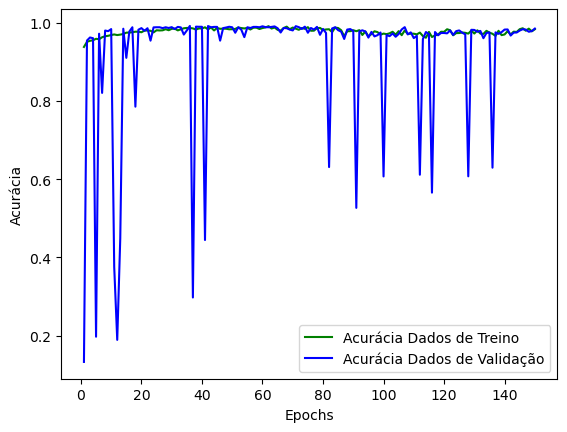

101/101 [==============================] - 1s 5ms/step


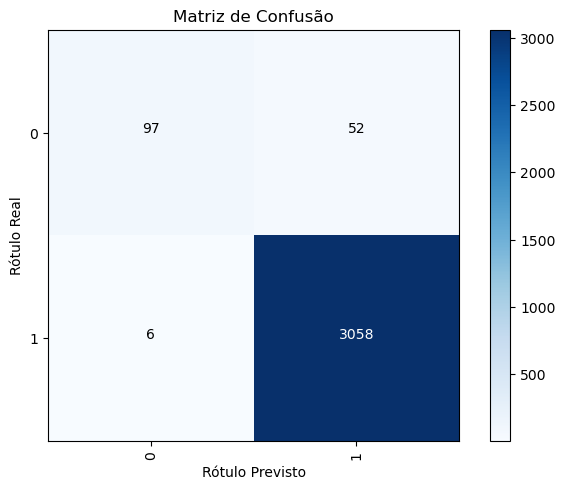

              precision    recall  f1-score   support

           0       0.94      0.65      0.77       149
           1       0.98      1.00      0.99      3064

    accuracy                           0.98      3213
   macro avg       0.96      0.82      0.88      3213
weighted avg       0.98      0.98      0.98      3213

MCC = 0.7748468103359091


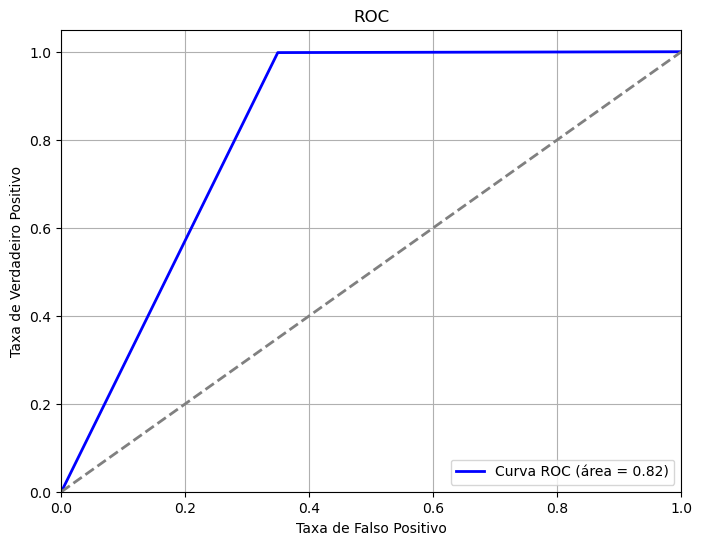

In [9]:
rede_MLP(X,y,7)

Epoch 1/150
302/302 [==============================] - 9s 29ms/step - loss: 0.5059 - acc: 0.9397 - val_loss: 0.1706 - val_acc: 0.9496
Epoch 2/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1853 - acc: 0.9522 - val_loss: 0.2256 - val_acc: 0.9521
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1640 - acc: 0.9530 - val_loss: 0.1586 - val_acc: 0.9589
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1470 - acc: 0.9570 - val_loss: 0.3362 - val_acc: 0.9054
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1341 - acc: 0.9589 - val_loss: 0.1178 - val_acc: 0.9642
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1242 - acc: 0.9617 - val_loss: 0.1191 - val_acc: 0.9611
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1122 - acc: 0.9654 - val_loss: 0.1021 - val_acc: 0.9692
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0246 - acc: 0.9919 - val_loss: 0.0645 - val_acc: 0.9829
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0235 - acc: 0.9924 - val_loss: 0.0517 - val_acc: 0.9851
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0411 - acc: 0.9861 - val_loss: 0.0578 - val_acc: 0.9807
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0318 - acc: 0.9880 - val_loss: 0.0554 - val_acc: 0.9847
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0302 - acc: 0.9890 - val_loss: 2.6265 - val_acc: 0.4420
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0439 - acc: 0.9861 - val_loss: 0.0539 - val_acc: 0.9857
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0432 - acc: 0.9851 - val_loss: 0.0559 - val_acc: 0.9826
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0771 - acc: 0.9722 - val_loss: 3.0999 - val_acc: 0.4731
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0721 - acc: 0.9743 - val_loss: 0.1051 - val_acc: 0.9658
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0586 - acc: 0.9790 - val_loss: 0.3572 - val_acc: 0.9505
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0725 - acc: 0.9730 - val_loss: 1.9684 - val_acc: 0.5907
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0683 - acc: 0.9767 - val_loss: 0.1163 - val_acc: 0.9611
Epoch 127/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0631 - acc: 0.9763 - val_loss: 0.1004 - val_acc: 0.9751
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0481 - acc: 0.9823 - val_loss: 0.0716 - val_acc: 0.9757
Epoch 129/150
302/302 [==============================] - 8s 28

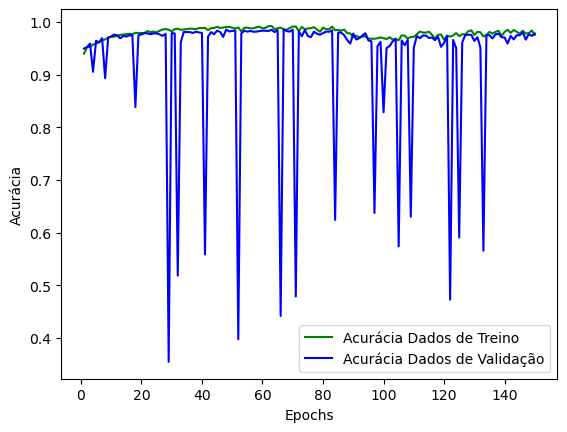

101/101 [==============================] - 1s 5ms/step


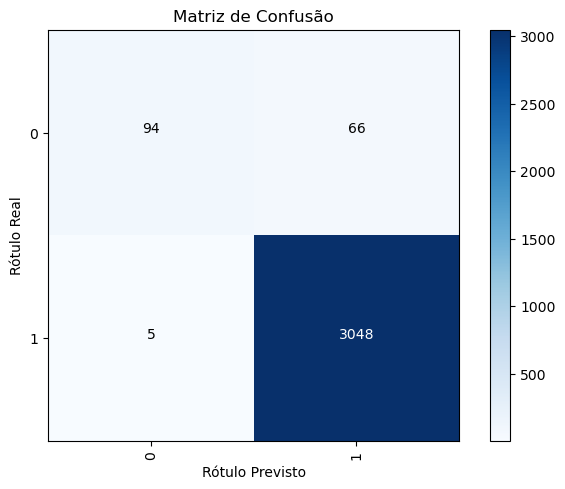

              precision    recall  f1-score   support

           0       0.95      0.59      0.73       160
           1       0.98      1.00      0.99      3053

    accuracy                           0.98      3213
   macro avg       0.96      0.79      0.86      3213
weighted avg       0.98      0.98      0.98      3213

MCC = 0.7374660289986739


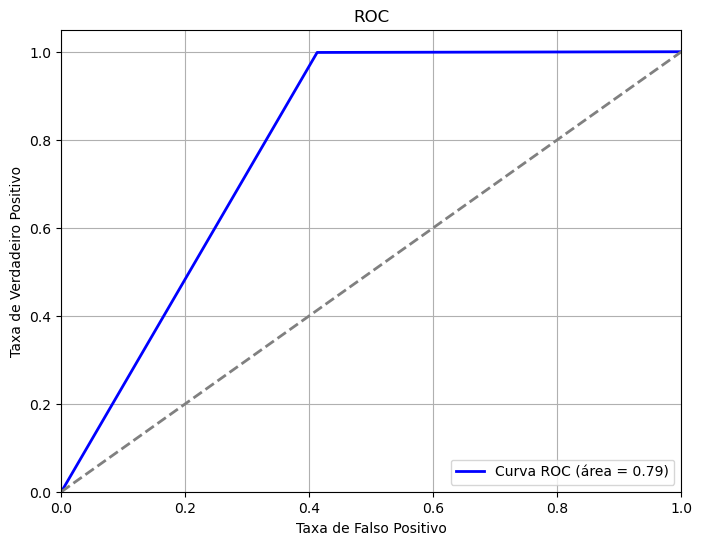

In [10]:
rede_MLP(X,y,8)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.4437 - acc: 0.9348 - val_loss: 0.1446 - val_acc: 0.9552
Epoch 2/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1915 - acc: 0.9487 - val_loss: 0.1272 - val_acc: 0.9570
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1728 - acc: 0.9500 - val_loss: 0.1244 - val_acc: 0.9583
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1462 - acc: 0.9564 - val_loss: 0.2241 - val_acc: 0.9502
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1372 - acc: 0.9597 - val_loss: 1.6766 - val_acc: 0.1503
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1395 - acc: 0.9579 - val_loss: 0.1047 - val_acc: 0.9754
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1147 - acc: 0.9643 - val_loss: 0.2834 - val_acc: 0.9048
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0251 - acc: 0.9908 - val_loss: 0.0377 - val_acc: 0.9885
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0255 - acc: 0.9916 - val_loss: 0.0461 - val_acc: 0.9872
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0235 - acc: 0.9914 - val_loss: 0.0712 - val_acc: 0.9835
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0226 - acc: 0.9917 - val_loss: 0.1080 - val_acc: 0.9779
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0314 - acc: 0.9894 - val_loss: 0.0421 - val_acc: 0.9876
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0300 - acc: 0.9887 - val_loss: 0.0446 - val_acc: 0.9863
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0243 - acc: 0.9911 - val_loss: 0.0419 - val_acc: 0.9869
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0790 - acc: 0.9684 - val_loss: 0.1191 - val_acc: 0.9595
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0921 - acc: 0.9657 - val_loss: 0.0905 - val_acc: 0.9714
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0760 - acc: 0.9702 - val_loss: 0.1221 - val_acc: 0.9605
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0556 - acc: 0.9797 - val_loss: 0.0627 - val_acc: 0.9807
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0661 - acc: 0.9762 - val_loss: 0.0849 - val_acc: 0.9732
Epoch 127/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0763 - acc: 0.9718 - val_loss: 0.0814 - val_acc: 0.9729
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0718 - acc: 0.9723 - val_loss: 0.1050 - val_acc: 0.9661
Epoch 129/150
302/302 [==============================] - 8s 28

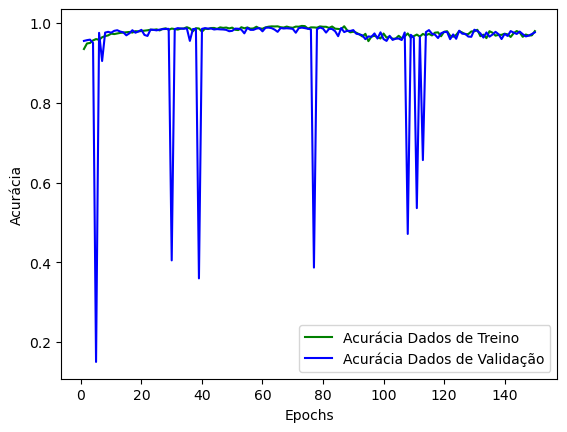

101/101 [==============================] - 1s 5ms/step


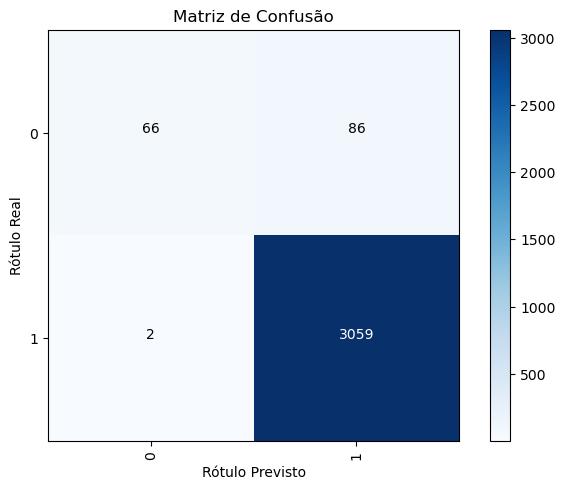

              precision    recall  f1-score   support

           0       0.97      0.43      0.60       152
           1       0.97      1.00      0.99      3061

    accuracy                           0.97      3213
   macro avg       0.97      0.72      0.79      3213
weighted avg       0.97      0.97      0.97      3213

MCC = 0.6394918667544276


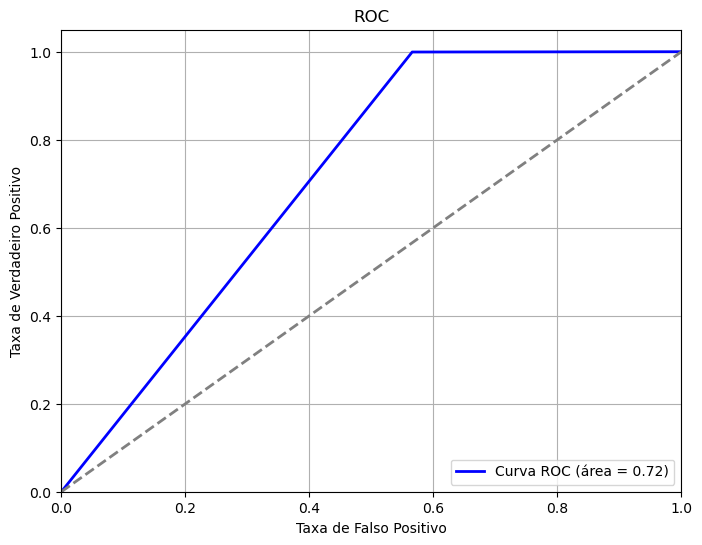

In [11]:
rede_MLP(X,y,9)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.4536 - acc: 0.9345 - val_loss: 0.1332 - val_acc: 0.9633
Epoch 2/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1956 - acc: 0.9479 - val_loss: 0.1206 - val_acc: 0.9636
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1711 - acc: 0.9498 - val_loss: 0.1041 - val_acc: 0.9645
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1458 - acc: 0.9552 - val_loss: 0.0895 - val_acc: 0.9776
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1325 - acc: 0.9594 - val_loss: 0.0842 - val_acc: 0.9720
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1208 - acc: 0.9607 - val_loss: 0.0725 - val_acc: 0.9795
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1128 - acc: 0.9649 - val_loss: 0.0687 - val_acc: 0.9829
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0325 - acc: 0.9874 - val_loss: 0.0460 - val_acc: 0.9851
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0308 - acc: 0.9885 - val_loss: 0.0363 - val_acc: 0.9888
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0378 - acc: 0.9867 - val_loss: 0.0364 - val_acc: 0.9882
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0237 - acc: 0.9926 - val_loss: 0.0363 - val_acc: 0.9857
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0598 - acc: 0.9797 - val_loss: 0.1144 - val_acc: 0.9583
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0339 - acc: 0.9874 - val_loss: 0.1029 - val_acc: 0.9745
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0394 - acc: 0.9857 - val_loss: 8.8433 - val_acc: 0.1992
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0724 - acc: 0.9733 - val_loss: 0.0688 - val_acc: 0.9782
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0808 - acc: 0.9693 - val_loss: 0.0601 - val_acc: 0.9795
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0813 - acc: 0.9689 - val_loss: 0.0664 - val_acc: 0.9785
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0680 - acc: 0.9749 - val_loss: 0.0437 - val_acc: 0.9847
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0663 - acc: 0.9753 - val_loss: 0.0689 - val_acc: 0.9782
Epoch 127/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0626 - acc: 0.9779 - val_loss: 0.0536 - val_acc: 0.9801
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0746 - acc: 0.9717 - val_loss: 0.0928 - val_acc: 0.9707
Epoch 129/150
302/302 [==============================] - 8s 28

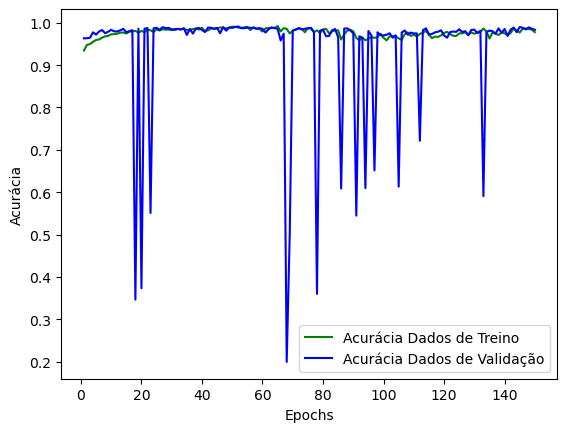

101/101 [==============================] - 1s 5ms/step


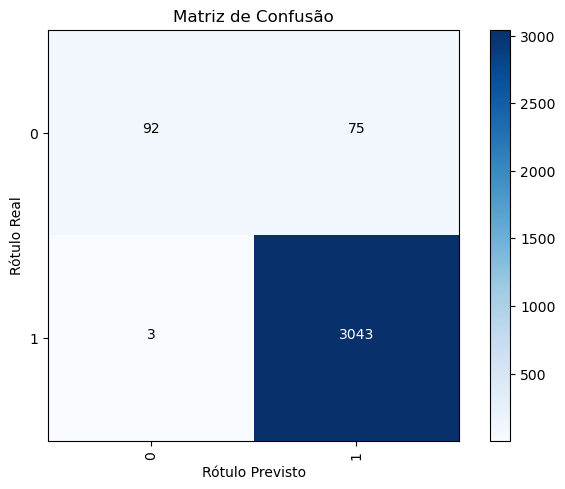

              precision    recall  f1-score   support

           0       0.97      0.55      0.70       167
           1       0.98      1.00      0.99      3046

    accuracy                           0.98      3213
   macro avg       0.97      0.77      0.84      3213
weighted avg       0.98      0.98      0.97      3213

MCC = 0.7206386563317804


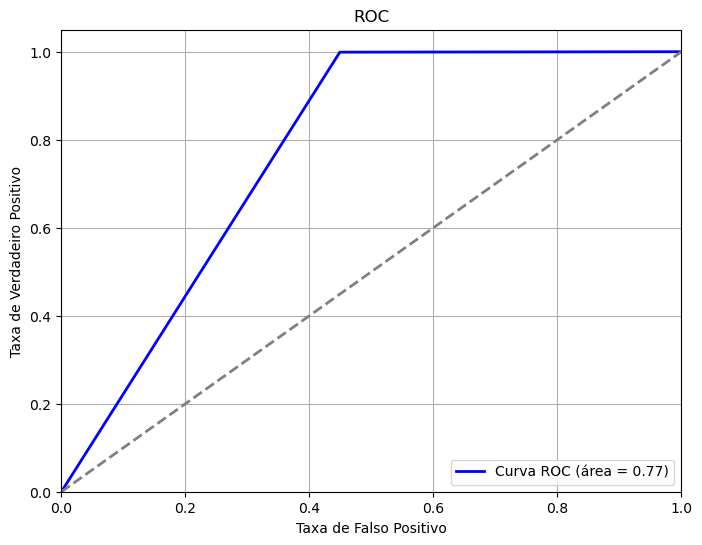

In [12]:
rede_MLP(X,y,10)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.4320 - acc: 0.9386 - val_loss: 0.1791 - val_acc: 0.9468
Epoch 2/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1991 - acc: 0.9490 - val_loss: 0.1610 - val_acc: 0.9468
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1759 - acc: 0.9519 - val_loss: 0.1433 - val_acc: 0.9490
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1559 - acc: 0.9548 - val_loss: 0.1218 - val_acc: 0.9586
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1439 - acc: 0.9542 - val_loss: 0.8582 - val_acc: 0.3355
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1322 - acc: 0.9594 - val_loss: 0.4269 - val_acc: 0.8593
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1196 - acc: 0.9609 - val_loss: 0.0951 - val_acc: 0.9651
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0200 - acc: 0.9928 - val_loss: 0.0513 - val_acc: 0.9857
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0259 - acc: 0.9912 - val_loss: 0.0388 - val_acc: 0.9879
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0197 - acc: 0.9921 - val_loss: 0.0373 - val_acc: 0.9876
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0223 - acc: 0.9920 - val_loss: 0.0389 - val_acc: 0.9872
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0242 - acc: 0.9914 - val_loss: 0.0478 - val_acc: 0.9869
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0179 - acc: 0.9930 - val_loss: 0.0394 - val_acc: 0.9872
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0162 - acc: 0.9938 - val_loss: 0.0419 - val_acc: 0.9879
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0923 - acc: 0.9661 - val_loss: 0.0909 - val_acc: 0.9689
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0973 - acc: 0.9647 - val_loss: 0.1072 - val_acc: 0.9599
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0808 - acc: 0.9694 - val_loss: 0.0848 - val_acc: 0.9723
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0889 - acc: 0.9672 - val_loss: 0.1052 - val_acc: 0.9630
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0785 - acc: 0.9697 - val_loss: 0.1039 - val_acc: 0.9639
Epoch 127/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0728 - acc: 0.9722 - val_loss: 0.1028 - val_acc: 0.9639
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0846 - acc: 0.9693 - val_loss: 0.0988 - val_acc: 0.9633
Epoch 129/150
302/302 [==============================] - 8s 28

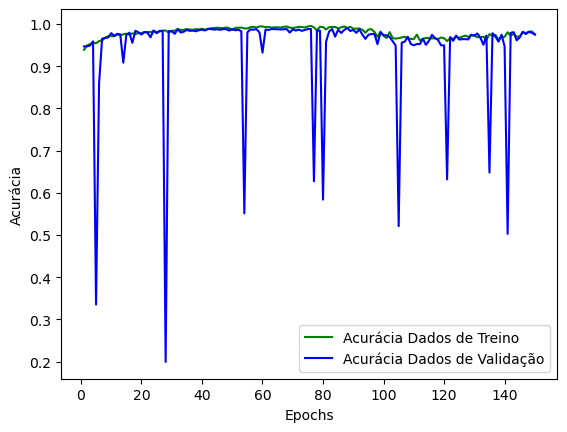

101/101 [==============================] - 1s 5ms/step


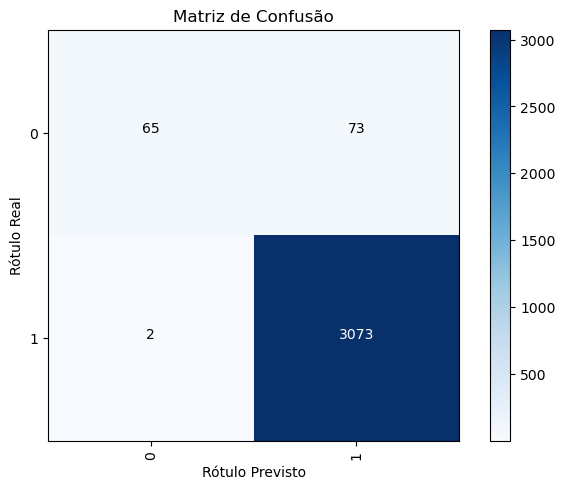

              precision    recall  f1-score   support

           0       0.97      0.47      0.63       138
           1       0.98      1.00      0.99      3075

    accuracy                           0.98      3213
   macro avg       0.97      0.74      0.81      3213
weighted avg       0.98      0.98      0.97      3213

MCC = 0.6673896962833282


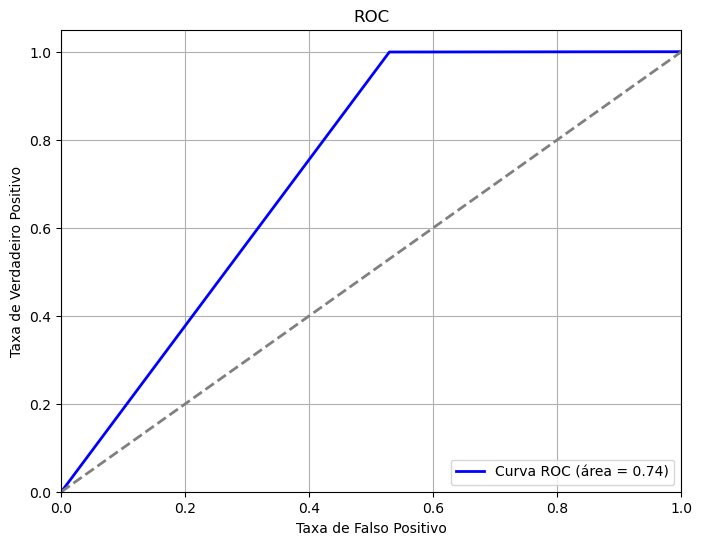

In [13]:
rede_MLP(X,y,11)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.4210 - acc: 0.9374 - val_loss: 0.5935 - val_acc: 0.7445
Epoch 2/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1984 - acc: 0.9483 - val_loss: 0.2118 - val_acc: 0.9477
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1704 - acc: 0.9542 - val_loss: 0.1368 - val_acc: 0.9524
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1492 - acc: 0.9567 - val_loss: 0.1680 - val_acc: 0.9711
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1324 - acc: 0.9600 - val_loss: 0.1217 - val_acc: 0.9602
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1203 - acc: 0.9629 - val_loss: 0.0960 - val_acc: 0.9704
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1100 - acc: 0.9663 - val_loss: 0.0923 - val_acc: 0.9701
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0308 - acc: 0.9893 - val_loss: 0.0525 - val_acc: 0.9841
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0300 - acc: 0.9896 - val_loss: 0.0474 - val_acc: 0.9835
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0353 - acc: 0.9866 - val_loss: 0.0520 - val_acc: 0.9857
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0316 - acc: 0.9895 - val_loss: 0.0488 - val_acc: 0.9860
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0393 - acc: 0.9858 - val_loss: 0.0915 - val_acc: 0.9689
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0318 - acc: 0.9891 - val_loss: 0.0659 - val_acc: 0.9826
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0242 - acc: 0.9922 - val_loss: 0.0675 - val_acc: 0.9823
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0621 - acc: 0.9766 - val_loss: 0.1125 - val_acc: 0.9636
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0709 - acc: 0.9727 - val_loss: 0.0858 - val_acc: 0.9714
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0631 - acc: 0.9768 - val_loss: 0.6566 - val_acc: 0.6536
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0844 - acc: 0.9669 - val_loss: 0.1348 - val_acc: 0.9595
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0756 - acc: 0.9722 - val_loss: 0.1496 - val_acc: 0.9608
Epoch 127/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0671 - acc: 0.9737 - val_loss: 0.6376 - val_acc: 0.6545
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0642 - acc: 0.9749 - val_loss: 0.1083 - val_acc: 0.9630
Epoch 129/150
302/302 [==============================] - 8s 28

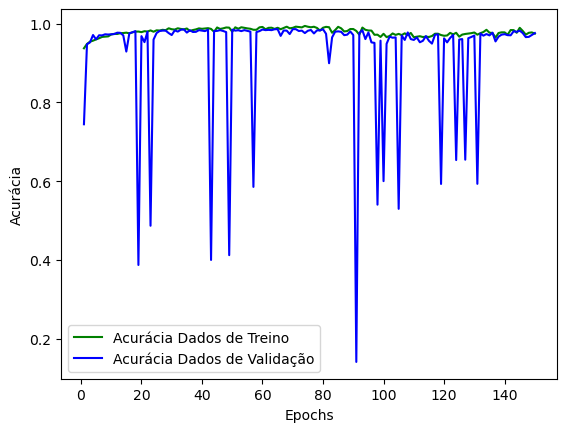

101/101 [==============================] - 1s 5ms/step


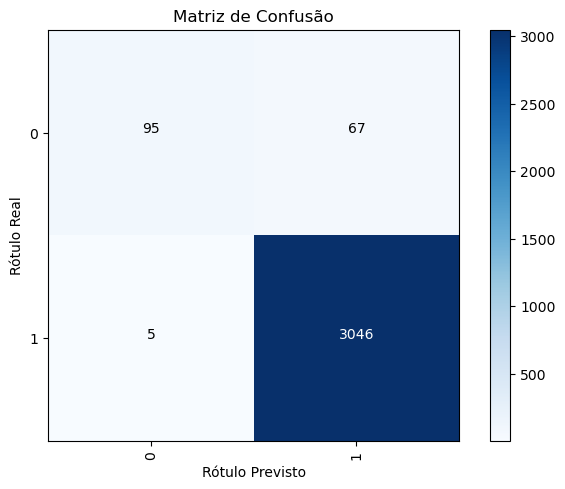

              precision    recall  f1-score   support

           0       0.95      0.59      0.73       162
           1       0.98      1.00      0.99      3051

    accuracy                           0.98      3213
   macro avg       0.96      0.79      0.86      3213
weighted avg       0.98      0.98      0.98      3213

MCC = 0.7368553894596852


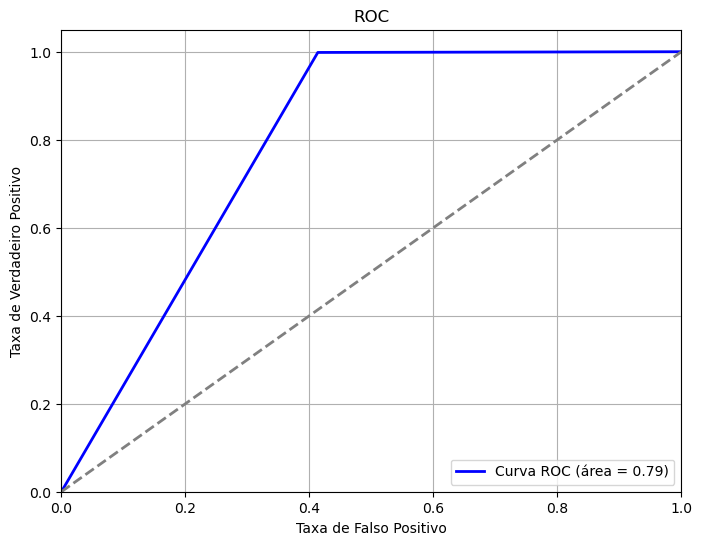

In [14]:
rede_MLP(X,y,12)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.5109 - acc: 0.9370 - val_loss: 0.1758 - val_acc: 0.9589
Epoch 2/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1835 - acc: 0.9504 - val_loss: 0.4404 - val_acc: 0.8503
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1620 - acc: 0.9511 - val_loss: 0.0977 - val_acc: 0.9648
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1384 - acc: 0.9577 - val_loss: 0.0897 - val_acc: 0.9683
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1266 - acc: 0.9604 - val_loss: 0.0852 - val_acc: 0.9701
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1178 - acc: 0.9639 - val_loss: 0.0726 - val_acc: 0.9763
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1045 - acc: 0.9672 - val_loss: 0.0723 - val_acc: 0.9779
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0488 - acc: 0.9841 - val_loss: 0.0376 - val_acc: 0.9851
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0377 - acc: 0.9865 - val_loss: 0.0418 - val_acc: 0.9857
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0353 - acc: 0.9875 - val_loss: 1.9930 - val_acc: 0.4743
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0505 - acc: 0.9836 - val_loss: 0.0398 - val_acc: 0.9841
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0620 - acc: 0.9791 - val_loss: 0.0409 - val_acc: 0.9826
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0399 - acc: 0.9863 - val_loss: 0.0453 - val_acc: 0.9835
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0334 - acc: 0.9878 - val_loss: 0.0361 - val_acc: 0.9863
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0533 - acc: 0.9802 - val_loss: 0.0501 - val_acc: 0.9841
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0753 - acc: 0.9691 - val_loss: 0.2399 - val_acc: 0.9701
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0601 - acc: 0.9784 - val_loss: 0.0592 - val_acc: 0.9804
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0530 - acc: 0.9796 - val_loss: 0.0802 - val_acc: 0.9707
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0904 - acc: 0.9652 - val_loss: 0.0771 - val_acc: 0.9791
Epoch 127/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0827 - acc: 0.9697 - val_loss: 0.1186 - val_acc: 0.9602
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0585 - acc: 0.9777 - val_loss: 0.0453 - val_acc: 0.9823
Epoch 129/150
302/302 [==============================] - 8s 28

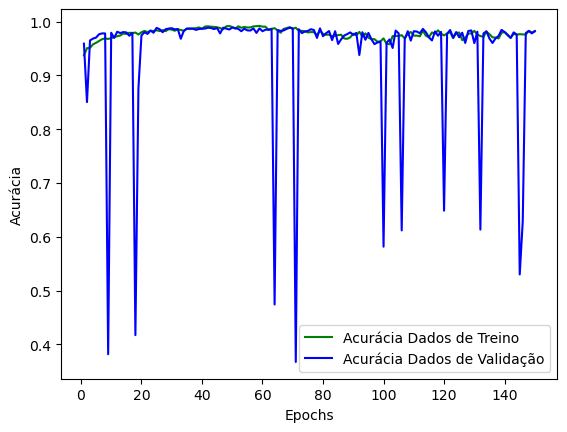

101/101 [==============================] - 1s 5ms/step


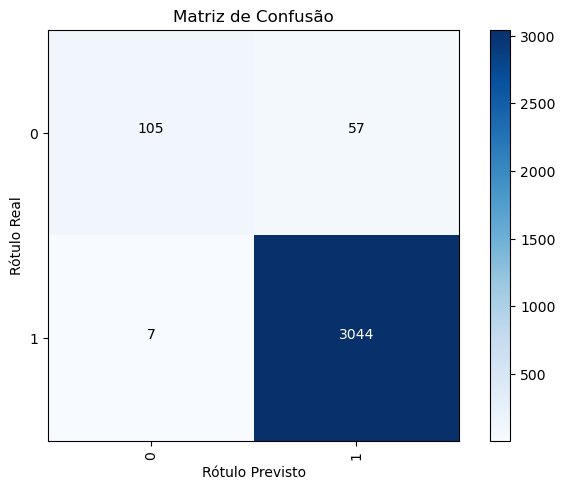

              precision    recall  f1-score   support

           0       0.94      0.65      0.77       162
           1       0.98      1.00      0.99      3051

    accuracy                           0.98      3213
   macro avg       0.96      0.82      0.88      3213
weighted avg       0.98      0.98      0.98      3213

MCC = 0.7704650593239034


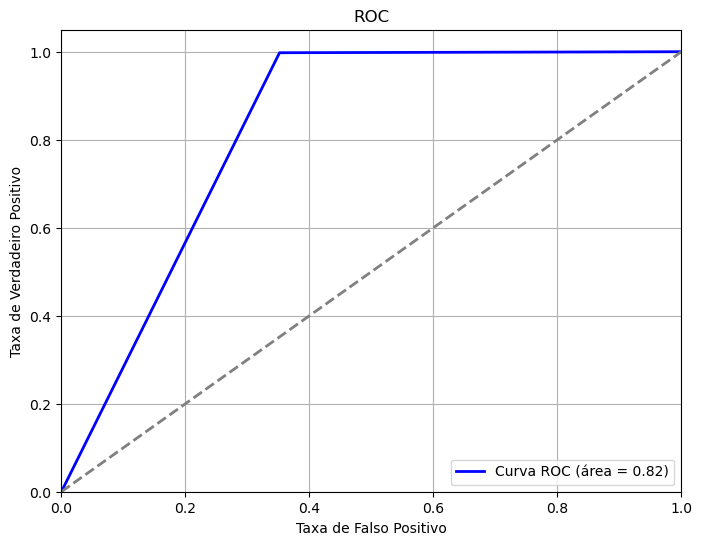

In [15]:
rede_MLP(X,y,13)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.4123 - acc: 0.9372 - val_loss: 1.0148 - val_acc: 0.2225
Epoch 2/150
302/302 [==============================] - 9s 28ms/step - loss: 0.2054 - acc: 0.9488 - val_loss: 0.1621 - val_acc: 0.9477
Epoch 3/150
302/302 [==============================] - 9s 28ms/step - loss: 0.1811 - acc: 0.9512 - val_loss: 0.1483 - val_acc: 0.9486
Epoch 4/150
302/302 [==============================] - 9s 28ms/step - loss: 0.1588 - acc: 0.9535 - val_loss: 0.4279 - val_acc: 0.8659
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1476 - acc: 0.9557 - val_loss: 0.1307 - val_acc: 0.9530
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1259 - acc: 0.9610 - val_loss: 0.1289 - val_acc: 0.9570
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1192 - acc: 0.9631 - val_loss: 0.0932 - val_acc: 0.9726
Epoch 8/150
302/302 [==============================] - 9s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0287 - acc: 0.9894 - val_loss: 0.0803 - val_acc: 0.9844
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0214 - acc: 0.9929 - val_loss: 0.0635 - val_acc: 0.9832
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0197 - acc: 0.9928 - val_loss: 0.0588 - val_acc: 0.9872
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0200 - acc: 0.9926 - val_loss: 0.0705 - val_acc: 0.9854
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0169 - acc: 0.9950 - val_loss: 0.0684 - val_acc: 0.9863
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0344 - acc: 0.9896 - val_loss: 0.0718 - val_acc: 0.9857
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0246 - acc: 0.9897 - val_loss: 0.2104 - val_acc: 0.9636
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0601 - acc: 0.9780 - val_loss: 0.1130 - val_acc: 0.9667
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0683 - acc: 0.9759 - val_loss: 0.1168 - val_acc: 0.9623
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0659 - acc: 0.9752 - val_loss: 0.2946 - val_acc: 0.7168
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0657 - acc: 0.9753 - val_loss: 0.0910 - val_acc: 0.9707
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0632 - acc: 0.9763 - val_loss: 0.2284 - val_acc: 0.9592
Epoch 127/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0864 - acc: 0.9658 - val_loss: 0.0980 - val_acc: 0.9673
Epoch 128/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0555 - acc: 0.9804 - val_loss: 0.0765 - val_acc: 0.9760
Epoch 129/150
302/302 [==============================] - 8s 28

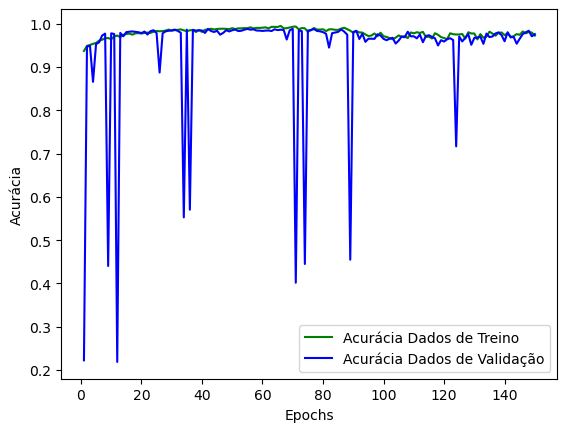

101/101 [==============================] - 1s 5ms/step


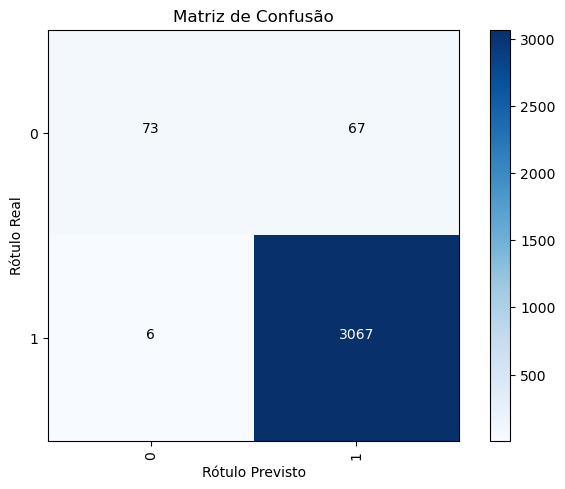

              precision    recall  f1-score   support

           0       0.92      0.52      0.67       140
           1       0.98      1.00      0.99      3073

    accuracy                           0.98      3213
   macro avg       0.95      0.76      0.83      3213
weighted avg       0.98      0.98      0.97      3213

MCC = 0.6847748675585609


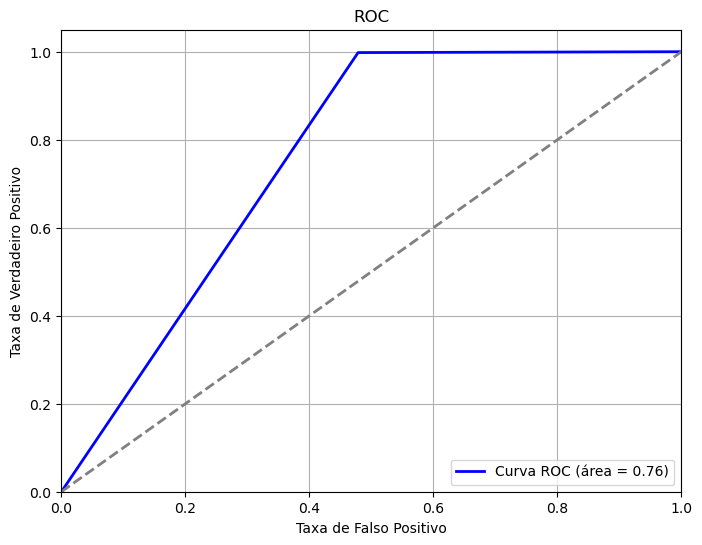

In [16]:
rede_MLP(X,y,14)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.4081 - acc: 0.9349 - val_loss: 0.1631 - val_acc: 0.9511
Epoch 2/150
302/302 [==============================] - 9s 28ms/step - loss: 0.1907 - acc: 0.9480 - val_loss: 0.1399 - val_acc: 0.9521
Epoch 3/150
302/302 [==============================] - 9s 28ms/step - loss: 0.1736 - acc: 0.9529 - val_loss: 0.1210 - val_acc: 0.9627
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1499 - acc: 0.9555 - val_loss: 0.1124 - val_acc: 0.9695
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1322 - acc: 0.9602 - val_loss: 0.1180 - val_acc: 0.9617
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1323 - acc: 0.9586 - val_loss: 0.1017 - val_acc: 0.9642
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1085 - acc: 0.9669 - val_loss: 0.0880 - val_acc: 0.9754
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0302 - acc: 0.9898 - val_loss: 0.0494 - val_acc: 0.9860
Epoch 63/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0267 - acc: 0.9911 - val_loss: 0.0469 - val_acc: 0.9876
Epoch 64/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0212 - acc: 0.9930 - val_loss: 0.0607 - val_acc: 0.9854
Epoch 65/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0298 - acc: 0.9892 - val_loss: 0.0515 - val_acc: 0.9854
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0237 - acc: 0.9915 - val_loss: 0.0483 - val_acc: 0.9872
Epoch 67/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0208 - acc: 0.9933 - val_loss: 0.0524 - val_acc: 0.9863
Epoch 68/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0251 - acc: 0.9907 - val_loss: 0.0438 - val_acc: 0.9882
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 9s 28ms/step - loss: 0.0616 - acc: 0.9787 - val_loss: 0.0851 - val_acc: 0.9711
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0590 - acc: 0.9794 - val_loss: 0.1180 - val_acc: 0.9620
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0630 - acc: 0.9779 - val_loss: 0.1387 - val_acc: 0.9617
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0641 - acc: 0.9755 - val_loss: 0.0792 - val_acc: 0.9732
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0934 - acc: 0.9652 - val_loss: 0.1434 - val_acc: 0.9564
Epoch 127/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0885 - acc: 0.9670 - val_loss: 0.1185 - val_acc: 0.9642
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0736 - acc: 0.9734 - val_loss: 0.1365 - val_acc: 0.9567
Epoch 129/150
302/302 [==============================] - 8s 28

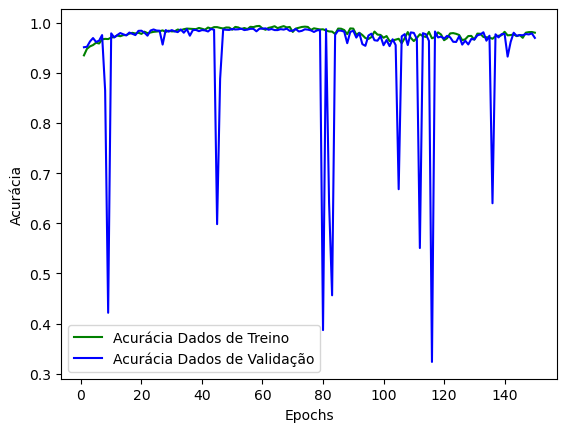

101/101 [==============================] - 1s 5ms/step


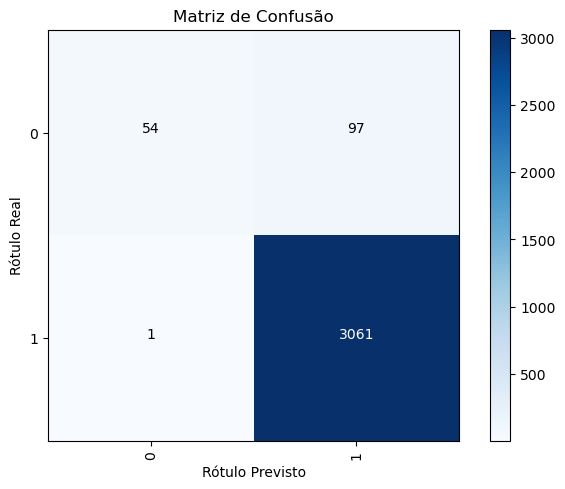

              precision    recall  f1-score   support

           0       0.98      0.36      0.52       151
           1       0.97      1.00      0.98      3062

    accuracy                           0.97      3213
   macro avg       0.98      0.68      0.75      3213
weighted avg       0.97      0.97      0.96      3213

MCC = 0.5829397653301757


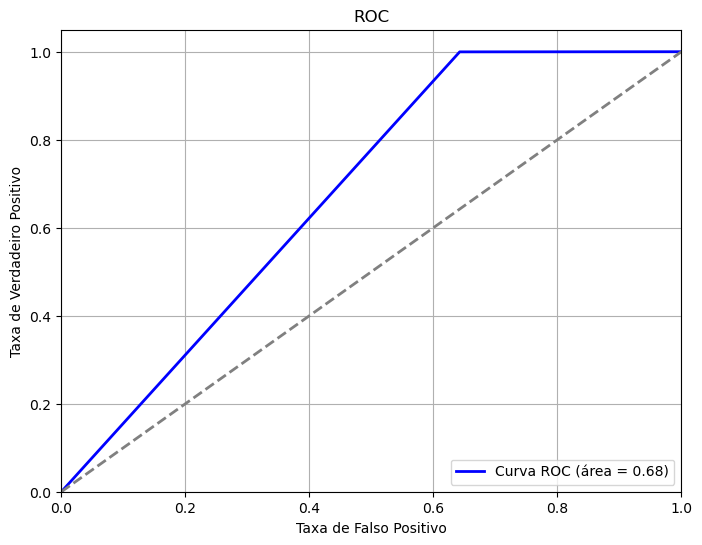

In [17]:
rede_MLP(X,y,15)

Epoch 1/150
302/302 [==============================] - 9s 29ms/step - loss: 0.4949 - acc: 0.9363 - val_loss: 0.1517 - val_acc: 0.9577
Epoch 2/150
302/302 [==============================] - 9s 28ms/step - loss: 0.1869 - acc: 0.9492 - val_loss: 0.1390 - val_acc: 0.9617
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1641 - acc: 0.9511 - val_loss: 0.1095 - val_acc: 0.9670
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1449 - acc: 0.9536 - val_loss: 0.1069 - val_acc: 0.9754
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1273 - acc: 0.9595 - val_loss: 0.1053 - val_acc: 0.9770
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1177 - acc: 0.9642 - val_loss: 0.1741 - val_acc: 0.9589
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1072 - acc: 0.9668 - val_loss: 0.0984 - val_acc: 0.9816
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0594 - acc: 0.9785 - val_loss: 0.0489 - val_acc: 0.9851
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0536 - acc: 0.9794 - val_loss: 0.0468 - val_acc: 0.9841
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0371 - acc: 0.9871 - val_loss: 0.0352 - val_acc: 0.9897
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0381 - acc: 0.9866 - val_loss: 0.0515 - val_acc: 0.9841
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0334 - acc: 0.9888 - val_loss: 0.0470 - val_acc: 0.9879
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0258 - acc: 0.9911 - val_loss: 0.0347 - val_acc: 0.9904
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0519 - acc: 0.9823 - val_loss: 0.0394 - val_acc: 0.9904
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0887 - acc: 0.9673 - val_loss: 0.0691 - val_acc: 0.9779
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0722 - acc: 0.9754 - val_loss: 0.0835 - val_acc: 0.9745
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0737 - acc: 0.9735 - val_loss: 0.0950 - val_acc: 0.9739
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0727 - acc: 0.9747 - val_loss: 0.0606 - val_acc: 0.9810
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0696 - acc: 0.9754 - val_loss: 0.0651 - val_acc: 0.9819
Epoch 127/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0744 - acc: 0.9717 - val_loss: 0.0615 - val_acc: 0.9782
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0647 - acc: 0.9751 - val_loss: 0.0530 - val_acc: 0.9879
Epoch 129/150
302/302 [==============================] - 8s 28

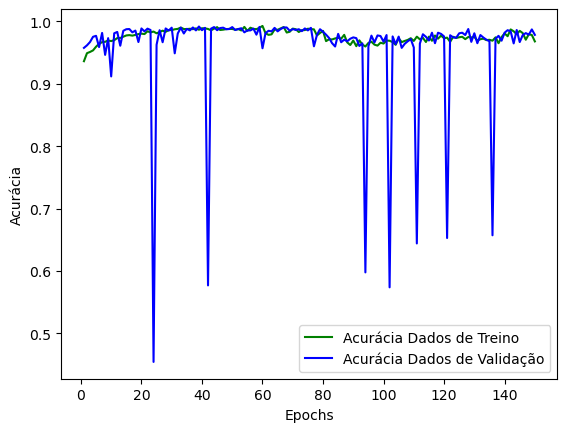

101/101 [==============================] - 1s 5ms/step


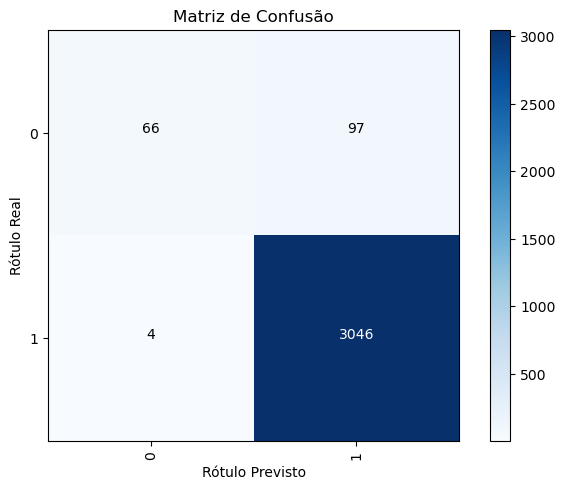

              precision    recall  f1-score   support

           0       0.94      0.40      0.57       163
           1       0.97      1.00      0.98      3050

    accuracy                           0.97      3213
   macro avg       0.96      0.70      0.78      3213
weighted avg       0.97      0.97      0.96      3213

MCC = 0.6066942833636726


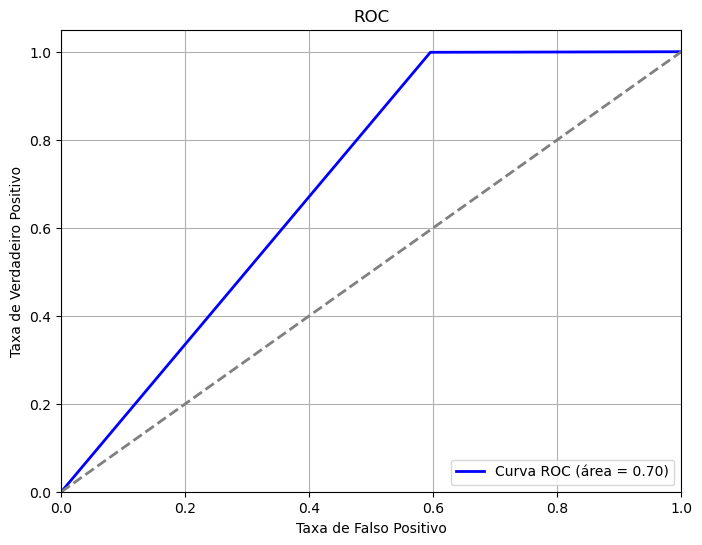

In [18]:
rede_MLP(X,y,16)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.4535 - acc: 0.9409 - val_loss: 0.2156 - val_acc: 0.9471
Epoch 2/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1897 - acc: 0.9520 - val_loss: 0.3768 - val_acc: 0.9225
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1667 - acc: 0.9533 - val_loss: 0.1485 - val_acc: 0.9508
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1526 - acc: 0.9542 - val_loss: 0.1414 - val_acc: 0.9502
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1361 - acc: 0.9589 - val_loss: 0.1182 - val_acc: 0.9630
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1245 - acc: 0.9608 - val_loss: 0.1060 - val_acc: 0.9623
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1143 - acc: 0.9639 - val_loss: 0.1567 - val_acc: 0.9592
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0342 - acc: 0.9892 - val_loss: 0.0654 - val_acc: 0.9801
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0412 - acc: 0.9861 - val_loss: 0.5006 - val_acc: 0.6483
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0493 - acc: 0.9826 - val_loss: 0.0978 - val_acc: 0.9726
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0277 - acc: 0.9899 - val_loss: 0.0661 - val_acc: 0.9816
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0288 - acc: 0.9902 - val_loss: 0.0905 - val_acc: 0.9745
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0471 - acc: 0.9821 - val_loss: 0.0699 - val_acc: 0.9745
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0424 - acc: 0.9856 - val_loss: 0.0678 - val_acc: 0.9779
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0955 - acc: 0.9649 - val_loss: 0.0930 - val_acc: 0.9636
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0777 - acc: 0.9705 - val_loss: 0.1355 - val_acc: 0.9558
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0748 - acc: 0.9724 - val_loss: 0.0869 - val_acc: 0.9704
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0911 - acc: 0.9667 - val_loss: 0.1663 - val_acc: 0.9493
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1050 - acc: 0.9607 - val_loss: 0.2916 - val_acc: 0.7314
Epoch 127/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0894 - acc: 0.9666 - val_loss: 0.1468 - val_acc: 0.9536
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0853 - acc: 0.9688 - val_loss: 0.1034 - val_acc: 0.9645
Epoch 129/150
302/302 [==============================] - 8s 28

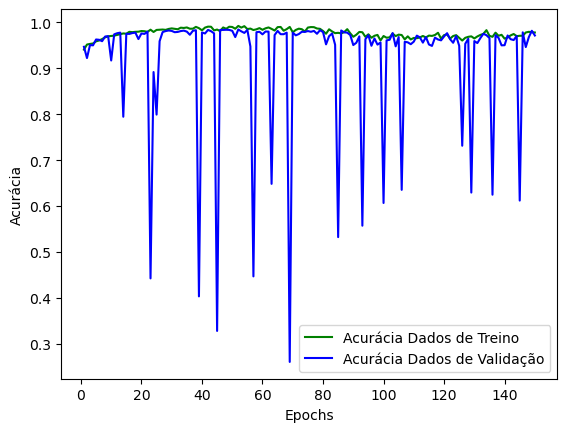

101/101 [==============================] - 1s 5ms/step


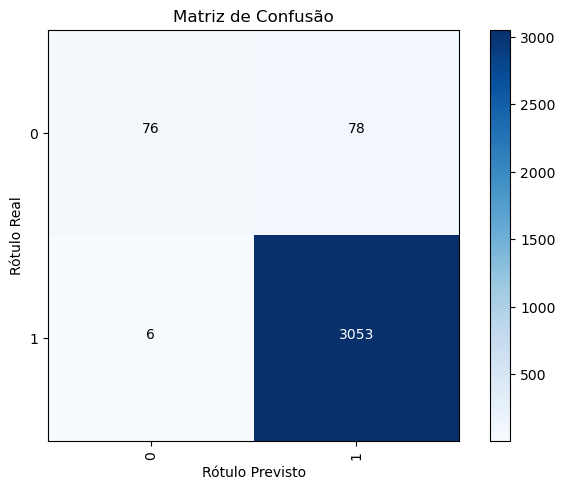

              precision    recall  f1-score   support

           0       0.93      0.49      0.64       154
           1       0.98      1.00      0.99      3059

    accuracy                           0.97      3213
   macro avg       0.95      0.75      0.82      3213
weighted avg       0.97      0.97      0.97      3213

MCC = 0.6658324881417902


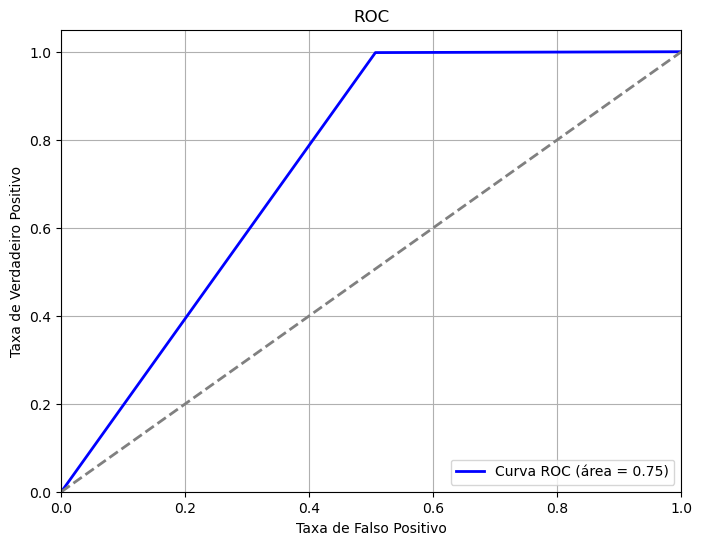

In [19]:
rede_MLP(X,y,17)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.4709 - acc: 0.9383 - val_loss: 0.1497 - val_acc: 0.9539
Epoch 2/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1868 - acc: 0.9501 - val_loss: 0.1347 - val_acc: 0.9574
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1616 - acc: 0.9529 - val_loss: 0.9751 - val_acc: 0.2297
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1515 - acc: 0.9538 - val_loss: 0.1069 - val_acc: 0.9608
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1298 - acc: 0.9598 - val_loss: 0.0885 - val_acc: 0.9714
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1225 - acc: 0.9621 - val_loss: 0.4136 - val_acc: 0.8425
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1125 - acc: 0.9645 - val_loss: 0.0753 - val_acc: 0.9739
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0555 - acc: 0.9807 - val_loss: 0.0404 - val_acc: 0.9854
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0346 - acc: 0.9874 - val_loss: 0.3117 - val_acc: 0.8979
Epoch 64/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0360 - acc: 0.9882 - val_loss: 0.0497 - val_acc: 0.9835
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0473 - acc: 0.9825 - val_loss: 0.0461 - val_acc: 0.9819
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0429 - acc: 0.9842 - val_loss: 0.0405 - val_acc: 0.9863
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0341 - acc: 0.9873 - val_loss: 0.0354 - val_acc: 0.9866
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0490 - acc: 0.9812 - val_loss: 0.0388 - val_acc: 0.9854
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 9s 28ms/step - loss: 0.0727 - acc: 0.9718 - val_loss: 0.0826 - val_acc: 0.9673
Epoch 123/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0617 - acc: 0.9773 - val_loss: 0.0471 - val_acc: 0.9832
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0429 - acc: 0.9853 - val_loss: 0.0571 - val_acc: 0.9819
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0459 - acc: 0.9835 - val_loss: 0.0684 - val_acc: 0.9782
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0686 - acc: 0.9742 - val_loss: 0.0707 - val_acc: 0.9767
Epoch 127/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0839 - acc: 0.9672 - val_loss: 0.0700 - val_acc: 0.9704
Epoch 128/150
302/302 [==============================] - 9s 28ms/step - loss: 0.0610 - acc: 0.9781 - val_loss: 0.0578 - val_acc: 0.9782
Epoch 129/150
302/302 [==============================] - 8s 28

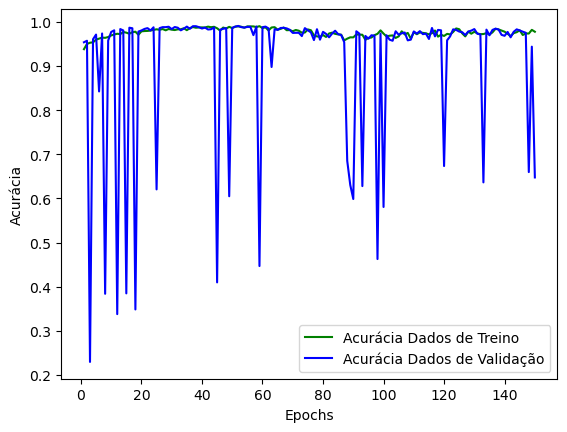

101/101 [==============================] - 1s 5ms/step


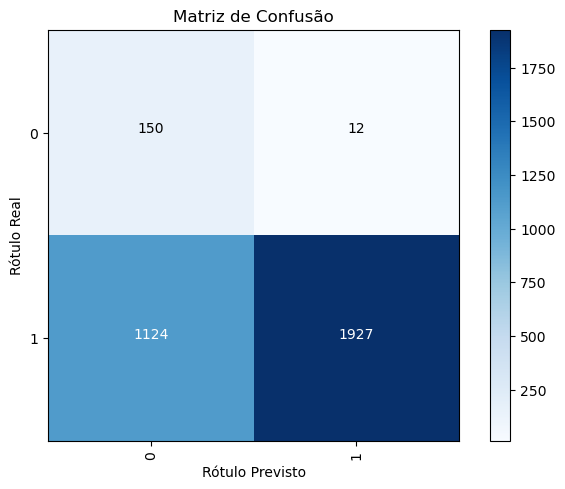

              precision    recall  f1-score   support

           0       0.12      0.93      0.21       162
           1       0.99      0.63      0.77      3051

    accuracy                           0.65      3213
   macro avg       0.56      0.78      0.49      3213
weighted avg       0.95      0.65      0.74      3213

MCC = 0.24938314554455124


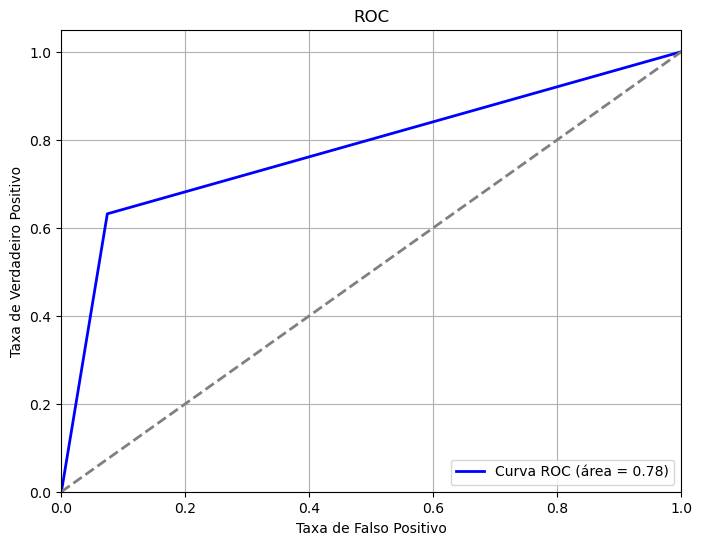

In [20]:
rede_MLP(X,y,18)

Epoch 1/150
302/302 [==============================] - 9s 28ms/step - loss: 0.4214 - acc: 0.9388 - val_loss: 0.1742 - val_acc: 0.9502
Epoch 2/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1933 - acc: 0.9507 - val_loss: 0.1548 - val_acc: 0.9502
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1669 - acc: 0.9530 - val_loss: 0.1398 - val_acc: 0.9533
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1475 - acc: 0.9552 - val_loss: 0.1183 - val_acc: 0.9592
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1293 - acc: 0.9606 - val_loss: 0.1093 - val_acc: 0.9661
Epoch 6/150
302/302 [==============================] - 9s 28ms/step - loss: 0.1156 - acc: 0.9642 - val_loss: 0.0986 - val_acc: 0.9686
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1058 - acc: 0.9673 - val_loss: 0.0923 - val_acc: 0.9723
Epoch 8/150
302/302 [==============================] - 9s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0283 - acc: 0.9909 - val_loss: 0.0842 - val_acc: 0.9779
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0253 - acc: 0.9908 - val_loss: 0.1776 - val_acc: 0.9427
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0338 - acc: 0.9890 - val_loss: 0.0580 - val_acc: 0.9835
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0293 - acc: 0.9896 - val_loss: 0.0777 - val_acc: 0.9804
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0340 - acc: 0.9887 - val_loss: 0.0628 - val_acc: 0.9841
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0283 - acc: 0.9897 - val_loss: 0.1063 - val_acc: 0.9751
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0258 - acc: 0.9911 - val_loss: 0.0700 - val_acc: 0.9832
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0825 - acc: 0.9698 - val_loss: 0.5746 - val_acc: 0.6495
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0741 - acc: 0.9736 - val_loss: 0.0911 - val_acc: 0.9670
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0797 - acc: 0.9690 - val_loss: 0.0886 - val_acc: 0.9701
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0705 - acc: 0.9728 - val_loss: 0.1041 - val_acc: 0.9692
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0747 - acc: 0.9709 - val_loss: 0.1382 - val_acc: 0.9577
Epoch 127/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0805 - acc: 0.9726 - val_loss: 0.1630 - val_acc: 0.9546
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0908 - acc: 0.9665 - val_loss: 0.1315 - val_acc: 0.9592
Epoch 129/150
302/302 [==============================] - 8s 28

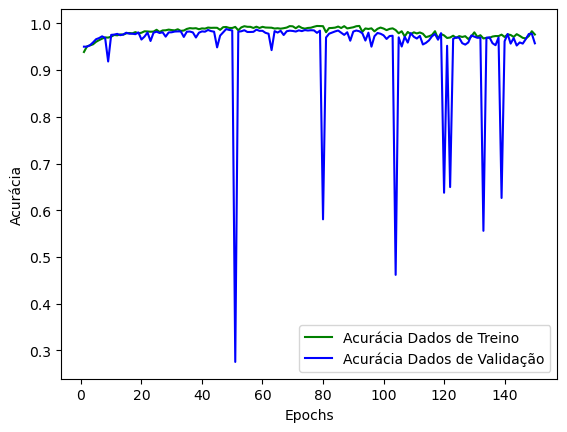

101/101 [==============================] - 1s 5ms/step


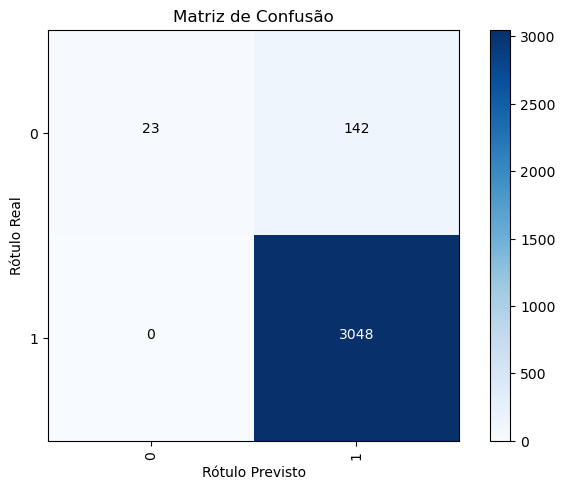

              precision    recall  f1-score   support

           0       1.00      0.14      0.24       165
           1       0.96      1.00      0.98      3048

    accuracy                           0.96      3213
   macro avg       0.98      0.57      0.61      3213
weighted avg       0.96      0.96      0.94      3213

MCC = 0.36495060312146804


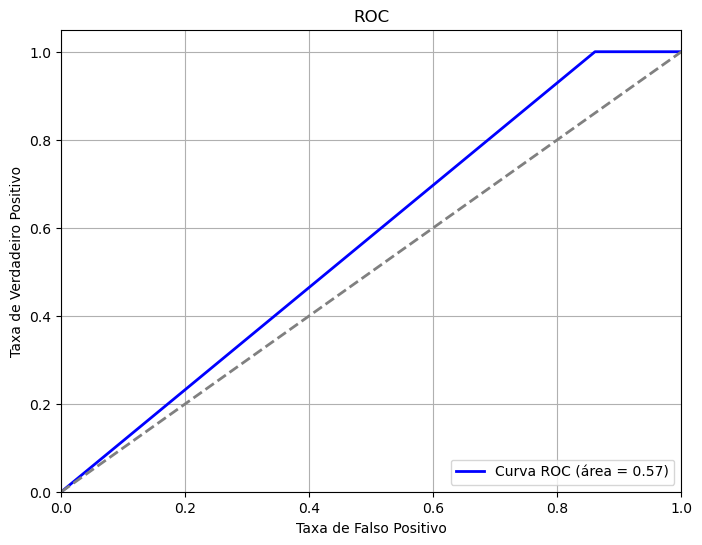

In [21]:
rede_MLP(X,y,19)

Epoch 1/150
302/302 [==============================] - 9s 29ms/step - loss: 0.4337 - acc: 0.9385 - val_loss: 0.1864 - val_acc: 0.9505
Epoch 2/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1954 - acc: 0.9488 - val_loss: 0.2335 - val_acc: 0.9661
Epoch 3/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1700 - acc: 0.9526 - val_loss: 0.1340 - val_acc: 0.9527
Epoch 4/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1555 - acc: 0.9559 - val_loss: 0.1105 - val_acc: 0.9599
Epoch 5/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1326 - acc: 0.9609 - val_loss: 0.1065 - val_acc: 0.9614
Epoch 6/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1249 - acc: 0.9623 - val_loss: 0.0947 - val_acc: 0.9701
Epoch 7/150
302/302 [==============================] - 8s 28ms/step - loss: 0.1131 - acc: 0.9661 - val_loss: 0.1007 - val_acc: 0.9673
Epoch 8/150
302/302 [==============================] - 8s 28ms

Epoch 62/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0249 - acc: 0.9916 - val_loss: 0.0406 - val_acc: 0.9882
Epoch 63/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0334 - acc: 0.9880 - val_loss: 0.0334 - val_acc: 0.9885
Epoch 64/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0171 - acc: 0.9937 - val_loss: 0.0346 - val_acc: 0.9854
Epoch 65/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0284 - acc: 0.9901 - val_loss: 0.0333 - val_acc: 0.9879
Epoch 66/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0188 - acc: 0.9940 - val_loss: 0.0342 - val_acc: 0.9891
Epoch 67/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0201 - acc: 0.9927 - val_loss: 0.0327 - val_acc: 0.9891
Epoch 68/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0235 - acc: 0.9916 - val_loss: 0.0325 - val_acc: 0.9900
Epoch 69/150
302/302 [==============================] -

302/302 [==============================] - 8s 28ms/step - loss: 0.0873 - acc: 0.9675 - val_loss: 0.0960 - val_acc: 0.9683
Epoch 123/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0650 - acc: 0.9772 - val_loss: 0.0764 - val_acc: 0.9745
Epoch 124/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0622 - acc: 0.9761 - val_loss: 0.0526 - val_acc: 0.9819
Epoch 125/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0661 - acc: 0.9742 - val_loss: 0.0694 - val_acc: 0.9739
Epoch 126/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0698 - acc: 0.9729 - val_loss: 0.0601 - val_acc: 0.9798
Epoch 127/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0740 - acc: 0.9733 - val_loss: 2.8720 - val_acc: 0.4924
Epoch 128/150
302/302 [==============================] - 8s 28ms/step - loss: 0.0855 - acc: 0.9749 - val_loss: 0.0843 - val_acc: 0.9679
Epoch 129/150
302/302 [==============================] - 8s 28

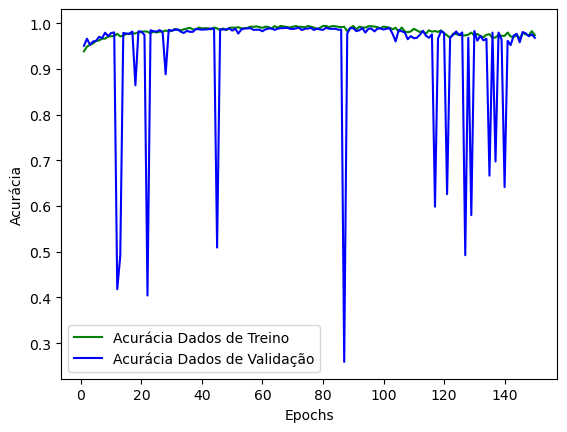

101/101 [==============================] - 1s 5ms/step


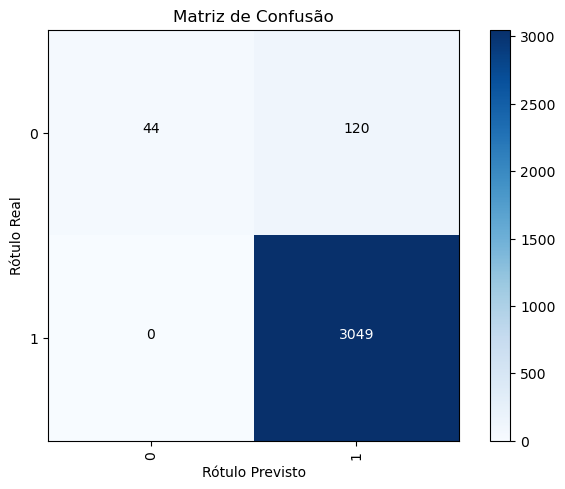

              precision    recall  f1-score   support

           0       1.00      0.27      0.42       164
           1       0.96      1.00      0.98      3049

    accuracy                           0.96      3213
   macro avg       0.98      0.63      0.70      3213
weighted avg       0.96      0.96      0.95      3213

MCC = 0.5080681924510408


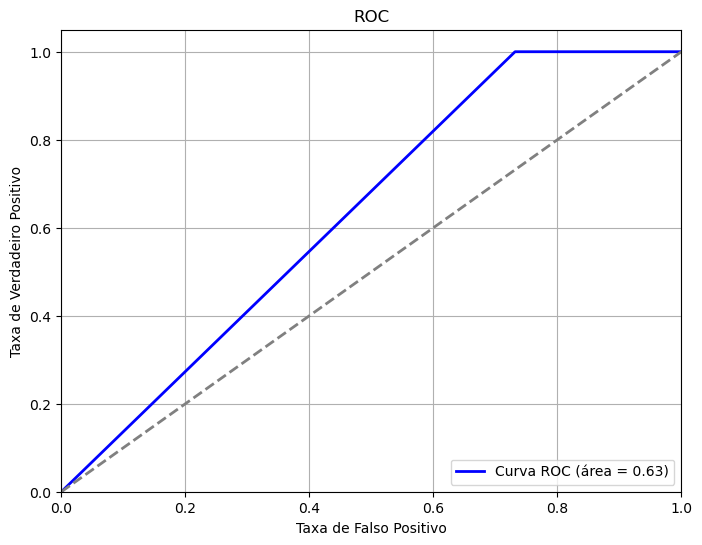

In [22]:
rede_MLP(X,y,20)